# Customer Personality Analysis

York St. John Student ID # 209122352
<br> May 2022

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px

In [203]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [204]:
df = pd.read_csv("marketing_campaign.csv", sep = "\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

# Data Cleansing

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [206]:
df_info = pd.DataFrame(columns=['Column', 'Null', 'Dtype', 'N_Unique'])
for i in range(0, len(df.columns)):
    df_info.loc[i] = [df.columns[i],
                        df[df.columns[i]].isnull().sum(),
                        df[df.columns[i]].dtypes,
                        df[df.columns[i]].nunique()] 
    
df_info

Column Null    Dtype N_Unique
0                    ID    0    int64     2240
1            Year_Birth    0    int64       59
2             Education    0   object        5
3        Marital_Status    0   object        8
4                Income   24  float64     1974
5               Kidhome    0    int64        3
6              Teenhome    0    int64        3
7           Dt_Customer    0   object      663
8               Recency    0    int64      100
9              MntWines    0    int64      776
10            MntFruits    0    int64      158
11      MntMeatProducts    0    int64      558
12      MntFishProducts    0    int64      182
13     MntSweetProducts    0    int64      177
14         MntGoldProds    0    int64      213
15    NumDealsPurchases    0    int64       15
16      NumWebPurchases    0    int64       15
17  NumCatalogPurchases    0    int64       14
18    NumStorePurchases    0    int64       14
19    NumWebVisitsMonth    0    int64       16
20         AcceptedCmp3    0    int64        2
21         AcceptedCmp4    0    int64        2
22         AcceptedCmp5    0    int64        2
23         AcceptedCmp1    0    int64        2
24         AcceptedCmp2    0    int64        2
25             Complain    0    int64        2
26        Z_CostContact    0    int64        1
27            Z_Revenue    0    int64        1
28             Response    0    int64        2

In [207]:
#Create table to show percentage of missing values in df
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    data = pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
    return data.head()
missing_data(df)

Total  Percentage
Income                24    1.071429
ID                     0    0.000000
NumDealsPurchases      0    0.000000
Z_Revenue              0    0.000000
Z_CostContact          0    0.000000

### As the 24 null values in Income only compromise 1% of the dataset, we will drop these records <br> Z_CostContact and Z-Revenue are constants with only one unique value - will drop them as well

In [208]:
#Drop the missing Income values 
df.dropna(inplace = True)

In [209]:
# check to unsure that no null values remain
df.isnull().sum().sort_values(ascending = False).head()

ID                   0
NumDealsPurchases    0
Z_Revenue            0
Z_CostContact        0
Complain             0
dtype: int64

In [210]:
# drop two columns that are constants (table above shows that they each only have 1 unique value)
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.shape

(2216, 27)

# Exploratory Data Analysis and Feature Engineering

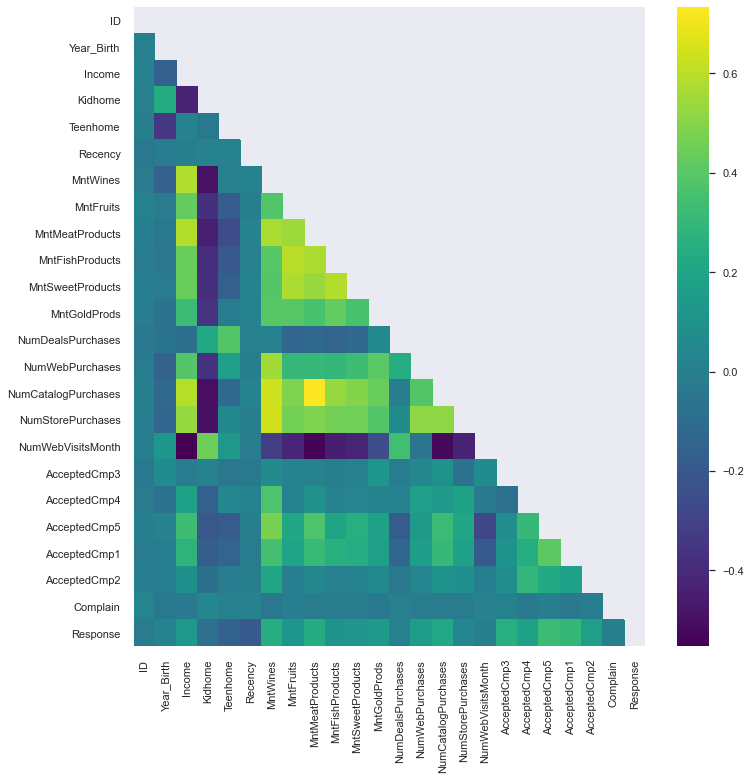

In [211]:
# Create heatmap to analyse correlation between the feature columns
sns.set(style="darkgrid")
corr=df.corr()
f, ax = plt.subplots(figsize=(11, 11))
cmap = sns.color_palette("viridis", as_cmap=True) #sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap=cmap, ax=ax,mask=mask) #annot=True
f.tight_layout()

In [212]:
# Checking for correlation by unstacking data 
# values are absolute, they make no distinction between negative or positive correlation

corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

NumCatalogPurchases  MntMeatProducts      0.734127
NumStorePurchases    MntWines             0.640012
NumCatalogPurchases  MntWines             0.634753
MntFruits            MntFishProducts      0.593431
NumCatalogPurchases  Income               0.589162
Income               MntMeatProducts      0.584633
MntFishProducts      MntSweetProducts     0.583867
Income               MntWines             0.578650
MntMeatProducts      MntFishProducts      0.573574
MntFruits            MntSweetProducts     0.571606
MntWines             MntMeatProducts      0.568860
NumWebPurchases      MntWines             0.553786
Income               NumWebVisitsMonth    0.553088
dtype: float64

Correlation: most of independent features are connected with high correlation. It will be reasonable to reduce the dimension before clustering to prevent from multicolinearity btw features.

In [213]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2216.000000       2216.000000   2216.000000        2216.000000   
mean         37.637635         27.028881     43.965253           2.323556   
std          54.752082         41.072046     51.815414           1.923716   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.500000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000          2216.000000        2216.000000   
mean          4.085289             2.671029           5.800993   
std           2.740951             2.926734           3.250785   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013538     0.009477     0.150271  
std        0.244950      0.115588     0.096907     0.357417  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000

In [214]:
# Check unique categories present in the "Marital_Status" feature
df['Marital_Status'].value_counts()  

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [215]:
# create two values for marital status: in a relationsip or single to simplify model

df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [216]:
# Confirm change and count values present in Marital_Status

df['Marital_Status'].value_counts()

Relationship    1430
Single           786
Name: Marital_Status, dtype: int64

Total promotions accepted:  994


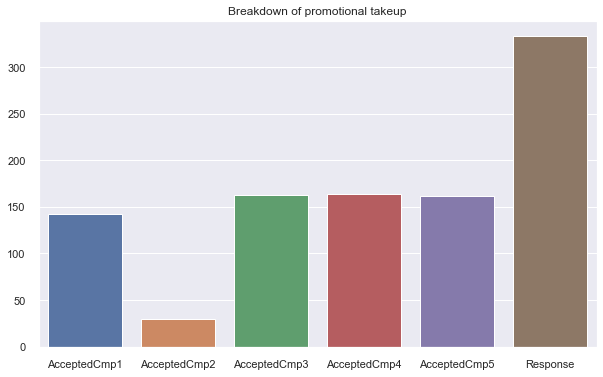

In [217]:
# Analyse the acceptance of promotional campaigns.  (Is it important which campaign they accepted? Can you accept more than one campaign?)
acceptedConcat = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
acceptedConcat = acceptedConcat.apply(pd.DataFrame.sum)

plt.figure(figsize=(10,6))
plt.title('Breakdown of promotional takeup')
sns.barplot(x=acceptedConcat.index, y=acceptedConcat)
print("Total promotions accepted: ",acceptedConcat.sum())

In [218]:
df["NumDealsPurchases"].value_counts()
# only 46 customers didn't purchase a deal

1     960
2     493
3     293
4     188
5      94
6      60
0      44
7      39
8      14
9       8
15      7
10      5
11      5
12      3
13      3
Name: NumDealsPurchases, dtype: int64

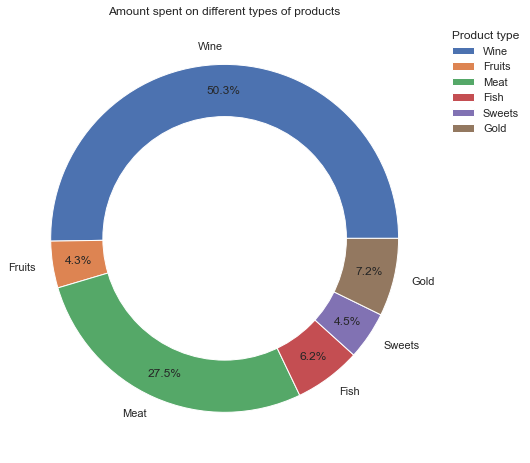

In [219]:
mnt = df.filter(like='Mnt').apply(lambda x: sum(x), axis=0)
sizes = dict(mnt)

plt.figure(figsize=(12, 8))
plt.title("Amount spent on different types of products")
plt.pie(sizes.values(), labels=['Wine', 'Fruits', 'Meat',
                                'Fish', 'Sweets', 'Gold'], autopct="%.1f%%", pctdistance=0.85)  #shadow=True
plt.legend(title="Product type", labels=['Wine', 'Fruits', 'Meat',
                                         'Fish', 'Sweets', 'Gold'], bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [220]:
# Combine features that relate to same metric to reduce dimensionality and simplify model

#create a figure for number of people in househould
df['family_size'] = df['Marital_Status'].replace({'Relationship': 2, 'Single': 1}) + df['Kidhome'] + df['Teenhome'] # feature will simplify to show if there are children living at home
# combine all expenses into one category
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
#combine accepted offers: at moment we don't care which campaigne the offer was accepted
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
#Feature indicating total children living in the household
df["kids"]=df["Kidhome"]+df["Teenhome"]
#Feature pertaining parenthood - used mostly for visualisation
df["parent"] = np.where(df.kids> 0, 1, 0)

In [221]:
df['family_size'].value_counts()

3    880
2    757
4    296
1    252
5     31
Name: family_size, dtype: int64

In [222]:
# check to see if some customers accepted more than one promotional offer
df['TotalAcceptedCmp'].value_counts()

0    1611
1     369
2     139
3      51
4      36
5      10
Name: TotalAcceptedCmp, dtype: int64

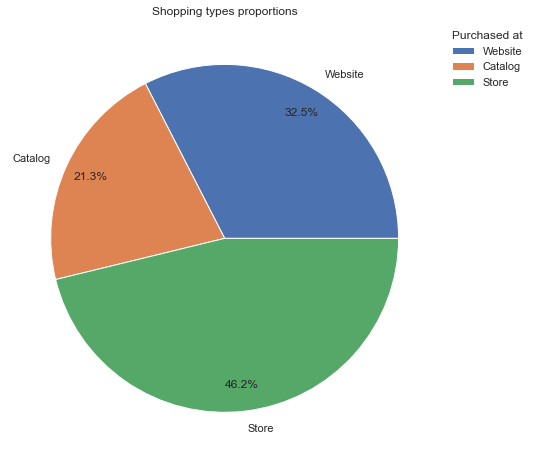

In [223]:
num = df.filter(regex='Num[^Deals].+Purchases').sum(axis=0)  #(regex='Num[^Deals].+Purchases')
sizes = dict(num)

plt.figure(figsize=(12, 8))
plt.title("Shopping types proportions")
plt.pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.85)
plt.legend(title="Purchased at", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1))

plt.show()

In [224]:
# rename columns for ease in understanding
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
df=df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   Relationship  71613.0        0         0   
3  6182        1984  Graduation   Relationship  26646.0        1         0   
4  5324        1981         PhD   Relationship  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  04-09-2012       58    635      88   546   172      88    88   
1  08-03-2014       38     11       1     6     2       1     6   
2  21-08-2013       26    426      49   127   111      21    42   
3  10-02-2014       26     11       4    20    10       3     5   
4  19-01-2014       94    173      43   118    46      27    15   

   NumDealsPurchases  Web  Catalog  Store  NumWebVisitsMonth  AcceptedCmp3  \
0                  3    8       10      4                  7             0   
1                  2    1        1      2                  5             0   
2                  1    8        2     10                  4             0   
3                  2    2        0      4                  6             0   
4                  5    5        3      6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   family_size  Expenses  TotalAcceptedCmp  kids  parent  
0            1      1617                 1     0       0  
1            3        27                 0     2       1  
2            2       776                 0     0       0  
3            3        53                 0     1       1  
4            3       422                 0     1       1

In [225]:
#combine all purchases
df['total_purchases'] = df['Web'] + df['Catalog'] + df['Store'] 

<Figure size 432x288 with 0 Axes>

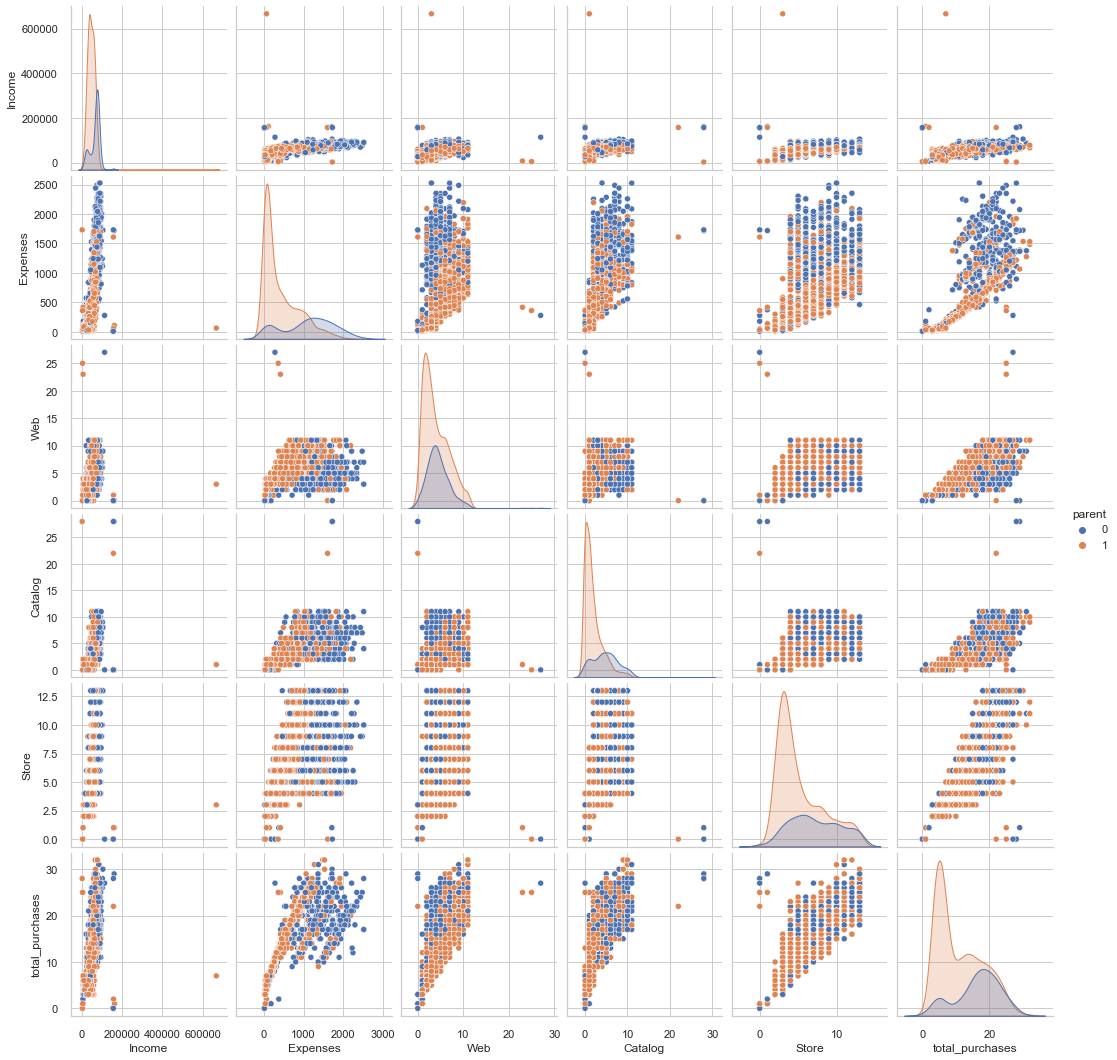

In [226]:
#To plot some selected features 
sns.set_style('whitegrid')
#Plotting following features
columns = [ "Income", "Expenses",'Web','Catalog','Store','total_purchases','parent']

plt.figure()
sns.pairplot(df[columns], hue= 'parent') # plot values with colour differentating whether customer has kids at home 
plt.show()

In [227]:
# seems to be one outlier in terms of income
df[df['Income']>200000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation   Relationship  666666.0        1   

      Teenhome Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
2233         0  02-06-2013       23      9      14    18     8       1    12   

      NumDealsPurchases  Web  Catalog  Store  NumWebVisitsMonth  AcceptedCmp3  \
2233                  4    3        1      3                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
2233             0             0             0             0         0   

      Response  family_size  Expenses  TotalAcceptedCmp  kids  parent  \
2233         0            3        62                 0     1       1   

      total_purchases  
2233                7

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='Income'>

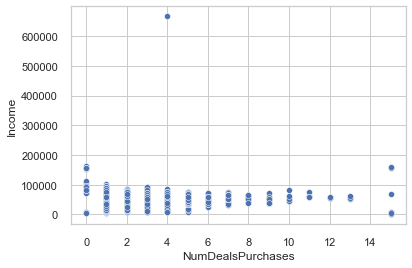

In [228]:
sns.scatterplot(x ='NumDealsPurchases' ,y='Income', data = df)

<AxesSubplot:title={'center':'Income vs Education'}, xlabel='Education', ylabel='Income'>

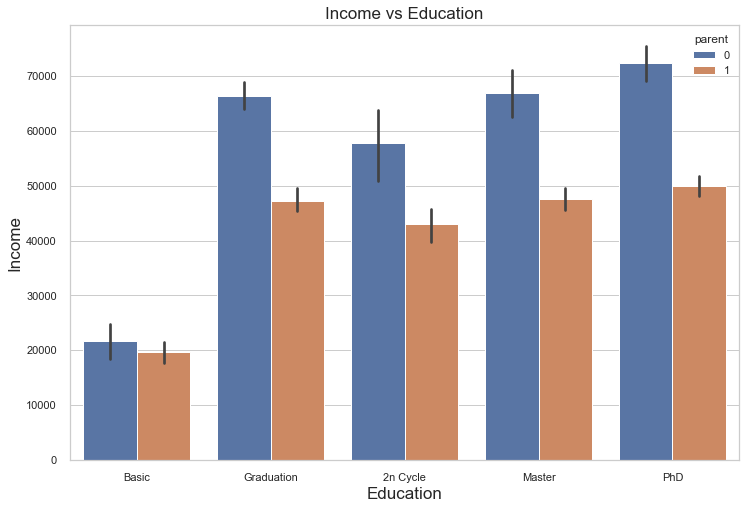

In [229]:
plt.figure(figsize=(12,8))
plt.title('Income vs Education', fontsize=17)
plt.xlabel('Education', fontsize=17)
plt.ylabel('Income', fontsize=17)
sns.barplot(x='Education', y='Income', data=df, order=['Basic','Graduation','2n Cycle', 'Master', 'PhD'], hue = 'parent')
# 2n Cycle is post-graduate
# Graduation? - assume that it is equivelent to undergraduate level

According to three Cycle System from the European Higher Education Area, 2n Cycle refers to Master degree. And Graduation means that the person is on the second - graduate cycle, so in fact he finished the first - undergraduate cycle (in many countries named Bachelor)

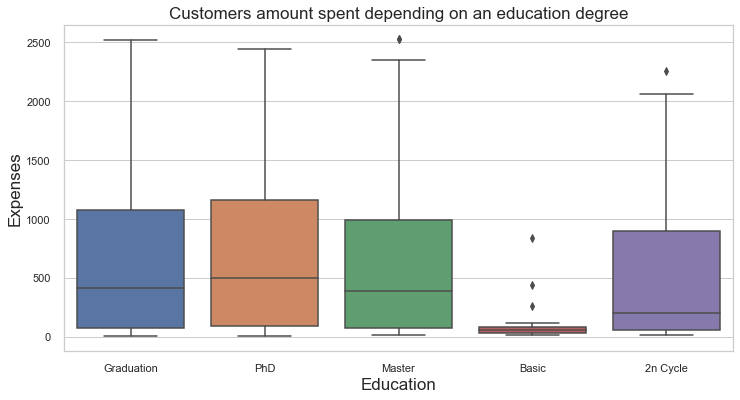

In [230]:
plt.figure(figsize=(12, 6))
plt.xlabel('Education', fontsize=17)
plt.ylabel('Expenses', fontsize=17)
ax = sns.boxplot(data=df, x='Education', y='Expenses')
plt.title('Customers amount spent depending on an education degree', fontsize=17)
plt.show()

In [231]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

From the Companies point of view, the difference between education levels is only valid for the income level and ammount spent.  Therefore, the only distintion based on the above charts is basic vs higher education

In [232]:
#  Changing feature to relfect two levels of education: post-secondary and basic ('basic' = no post-secondary education)

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Master','Graduation'],'higherEdu')  
#df['Education'] = df['Education'].replace(['Graduation'], 'undergrad')
df['Education'] = df['Education'].replace(['Basic'], 'basicEdu')
# will likely have to turn these into binary features later (0/1)

In [233]:
df['Recency'].value_counts().head()

56    37
54    32
30    32
46    31
92    30
Name: Recency, dtype: int64

In [234]:
#change Dt_Customer to datetime and create new feature which shows the number of days that customer has been patron

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
# #Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date is:",max(dates))
print("The oldest customer's enrolment date is:",min(dates))

#Created a feature "Customer_For"
days = []
newest =  max(dates) #assuming they are the newest customer
for i in dates:
    d = newest - i
    days.append(d)
df["Custom_days"] = days
df["Custom_days"] = (df.Custom_days / np.timedelta64(1,'D')).astype(int)

The newest customer's enrolment date is: 2014-12-06
The oldest customer's enrolment date is: 2012-01-08


In [235]:
df.head()

ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  higherEdu         Single  58138.0        0         0   
1  2174        1954  higherEdu         Single  46344.0        1         1   
2  4141        1965  higherEdu   Relationship  71613.0        0         0   
3  6182        1984  higherEdu   Relationship  26646.0        1         0   
4  5324        1981  higherEdu   Relationship  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-04-09       58    635      88   546   172      88    88   
1  2014-08-03       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-10-02       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  Web  Catalog  Store  NumWebVisitsMonth  AcceptedCmp3  \
0                  3    8       10      4                  7             0   
1                  2    1        1      2                  5             0   
2                  1    8        2     10                  4             0   
3                  2    2        0      4                  6             0   
4                  5    5        3      6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   family_size  Expenses  TotalAcceptedCmp  kids  parent  total_purchases  \
0            1      1617                 1     0       0               22   
1            3        27                 0     2       1                4   
2            2       776                 0     0       0               20   
3            3        53                 0     1       1                6   
4            3       422                 0     1       1               14   

   Custom_days  
0          971  
1          125  
2          472  
3           65  
4          321

In [236]:
df['Year_Birth'].value_counts(ascending = True).head()

1900    1
1941    1
1899    1
1893    1
1940    1
Name: Year_Birth, dtype: int64

In [237]:
# set age to current year, even though dataset seems to be from 2014/2015
current_year = datetime.now().year
current_year

2022

In [238]:
# Adding a column "Age" in the dataframe.  Will remove Year_Birth later.
df['Age'] = (current_year - df['Year_Birth']).astype('int')
df.Age.describe()

count    2216.000000
mean       53.179603
std        11.985554
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [239]:
#Look at age outliers

df.loc[df['Age'] >= 120]

ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  higherEdu         Single  36640.0        1         0   
239  11004        1893  higherEdu         Single  60182.0        0         1   
339   1150        1899  higherEdu   Relationship  83532.0        0         0   

    Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
192  2013-09-26       99     15       6     8     7       4    25   
239  2014-05-17       23      8       0     5     7       0     2   
339  2013-09-26       36    755     144   562   104      64   224   

     NumDealsPurchases  Web  Catalog  Store  NumWebVisitsMonth  AcceptedCmp3  \
192                  1    2        1      2                  5             0   
239                  1    1        0      2                  4             0   
339                  1    4        6      4                  1             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
192             0             0             0             0         1   
239             0             0             0             0         0   
339             0             1             0             0         0   

     Response  family_size  Expenses  TotalAcceptedCmp  kids  parent  \
192         0            2        65                 0     1       1   
239         0            2        22                 0     1       1   
339         0            2      1853                 1     0       0   

     total_purchases  Custom_days  Age  
192                5          436  122  
239                3          203  129  
339               14          436  123

There is 1893 in Year_Birth. Though this could be reasonable if that person is truly healthy but...seems dodgy they have a teen at home.  Could be multi-generational household, but unlikely that the oldest person in the house would be in the customer database.  More likely that the records are a result of error in data input stage.  Will replace values with median age

In [240]:
df1 = df.groupby('Age').agg({ 'Education' : 'count', 'Marital_Status' : 'count', 'Income':'mean', 'family_size' : 'mean',
       'Recency':'mean', 'NumDealsPurchases' : 'mean', 'Web' : 'mean','Catalog' : 'mean', 
        'Store' : 'mean', 'NumWebVisitsMonth' : 'mean', 'Complain' : 'sum', 'Expenses' : 'mean'})
df1.head()

Education  Marital_Status        Income  family_size    Recency  \
Age                                                                    
26           2               2  10960.500000     2.000000  52.500000   
27           5               5  60937.000000     1.000000  51.600000   
28           3               3  85449.333333     1.666667  31.666667   
29           5               5  74139.800000     1.000000  53.800000   
30          13              13  47830.153846     1.846154  45.923077   

     NumDealsPurchases       Web   Catalog     Store  NumWebVisitsMonth  \
Age                                                                       
26            2.000000  2.000000  0.500000  2.500000           7.000000   
27            1.000000  2.800000  4.800000  7.200000           4.200000   
28            1.000000  5.000000  4.666667  9.333333           3.333333   
29            1.000000  4.400000  6.800000  5.800000           1.600000   
30            1.461538  3.153846  3.384615  5.153846           5.230769   

     Complain     Expenses  
Age                         
26          0    69.000000  
27          1   761.200000  
28          0  1457.333333  
29          0  1191.200000  
30          0   685.538462

In [241]:
df1.tail()

Education  Marital_Status   Income  family_size  Recency  \
Age                                                             
81           1               1  93027.0          2.0     77.0   
82           1               1  51141.0          1.0     96.0   
122          1               1  36640.0          2.0     99.0   
123          1               1  83532.0          2.0     36.0   
129          1               1  60182.0          2.0     23.0   

     NumDealsPurchases  Web  Catalog  Store  NumWebVisitsMonth  Complain  \
Age                                                                        
81                 0.0  7.0     10.0    5.0                2.0         0   
82                 1.0  3.0      1.0    4.0                5.0         0   
122                1.0  2.0      1.0    2.0                5.0         1   
123                1.0  4.0      6.0    4.0                1.0         0   
129                1.0  1.0      0.0    2.0                4.0         0   

     Expenses  
Age            
81     2119.0  
82      157.0  
122      65.0  
123    1853.0  
129      22.0

In [242]:
df['Complain'].value_counts()

0    2195
1      21
Name: Complain, dtype: int64

#### Outliers

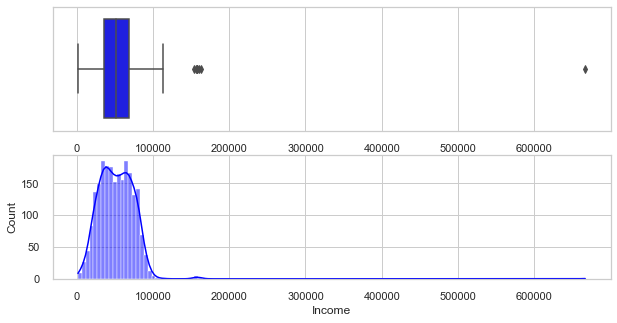

In [243]:
# plot outliers in income
fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = df, x = 'Income', color = 'blue', ax = axes[0])
sns.histplot(data = df, x = 'Income', kde=True, color='blue', ax = axes[1])
plt.show()

In [244]:
# there are six customers who have 0 total purchases but show expenses.  Doesn't make sense
# two of these are also outliers for Income (>150000)
df[df['total_purchases'] == 0]

ID  Year_Birth  Education Marital_Status    Income  Kidhome  \
655    5555        1975  higherEdu         Single  153924.0        0   
981    3955        1965  higherEdu         Single    4861.0        0   
1245   6862        1971  higherEdu         Single    1730.0        0   
1524  11110        1973  higherEdu         Single    3502.0        1   
1846   9931        1963  higherEdu   Relationship    4023.0        1   
2132  11181        1949  higherEdu   Relationship  156924.0        0   

      Teenhome Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
655          0  2014-07-02       81      1       1     1     1       1     1   
981          0  2014-06-22       20      2       1     1     1       0     1   
1245         0  2014-05-18       65      1       1     3     1       1     1   
1524         0  2013-04-13       56      2       1     1     0       0     1   
1846         1  2014-06-23       29      5       0     1     1       1     1   
2132         0  2013-08-29       85      2       1     2     1       1     1   

      NumDealsPurchases  Web  Catalog  Store  NumWebVisitsMonth  AcceptedCmp3  \
655                   0    0        0      0                  0             0   
981                   0    0        0      0                 14             0   
1245                 15    0        0      0                 20             0   
1524                  0    0        0      0                 14             0   
1846                 15    0        0      0                 19             0   
2132                  0    0        0      0                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
655              0             0             0             0         0   
981              0             0             0             0         0   
1245             0             0             0             0         0   
1524             0             0             0             0         0   
1846             0             0             0             0         0   
2132             0             0             0             0         0   

      Response  family_size  Expenses  TotalAcceptedCmp  kids  parent  \
655          0            1         6                 0     0       0   
981          0            1         6                 0     0       0   
1245         0            1         8                 0     0       0   
1524         0            2         5                 0     1       1   
1846         0            4         9                 0     2       1   
2132         0            2         8                 0     0       0   

      total_purchases  Custom_days  Age  
655                 0          157   47  
981                 0          167   57  
1245                0          202   51  
1524                0          602   49  
1846                0          166   59  
2132                0          464   73

In [245]:
#drop 6 inconsistent data records
df = df[df.total_purchases != 0]
df[df['total_purchases'] == 0]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, Web, Catalog, Store, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, family_size, Expenses, TotalAcceptedCmp, kids, parent, total_purchases, Custom_days, Age]
Index: []

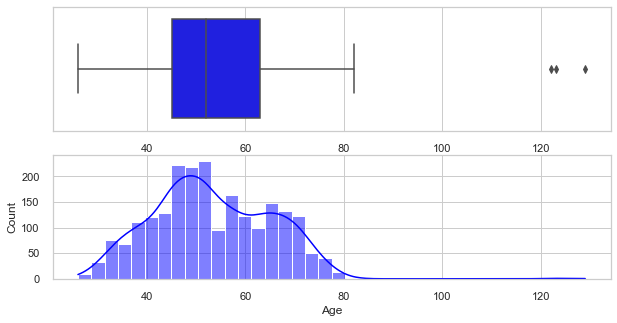

In [246]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = df, x = 'Age', color = 'Blue', ax = axes[0])
sns.histplot(data = df, x = 'Age', kde=True, color='blue', ax = axes[1])
plt.show()

In [247]:
# view outliers in income
from scipy import stats
income_outliers = df[(np.abs(stats.zscore(df['Income'])) >= 3)]
income_outliers

ID  Year_Birth  Education Marital_Status    Income  Kidhome  Teenhome  \
164   8475        1973  higherEdu   Relationship  157243.0        0         1   
617   1503        1976  higherEdu   Relationship  162397.0        1         1   
687   1501        1982  higherEdu   Relationship  160803.0        0         0   
1300  5336        1971  higherEdu   Relationship  157733.0        1         0   
1653  4931        1977  higherEdu   Relationship  157146.0        0         0   
2233  9432        1977  higherEdu   Relationship  666666.0        1         0   

     Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
164   2014-01-03       98     20       2  1582     1       2     1   
617   2013-03-06       31     85       1    16     2       1     2   
687   2012-04-08       21     55      16  1622    17       3     4   
1300  2013-04-06       37     39       1     9     2       0     8   
1653  2013-04-29       13      1       0  1725     2       1     1   
2233  2013-02-06       23      9      14    18     8       1    12   

      NumDealsPurchases  Web  Catalog  Store  NumWebVisitsMonth  AcceptedCmp3  \
164                  15    0       22      0                  0             0   
617                   0    0        0      1                  1             0   
687                  15    0       28      1                  0             0   
1300                  0    1        0      1                  1             0   
1653                  0    0       28      0                  1             0   
2233                  4    3        1      3                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
164              0             0             0             0         0   
617              0             0             0             0         0   
687              0             0             0             0         0   
1300             0             0             0             0         0   
1653             0             0             0             0         0   
2233             0             0             0             0         0   

      Response  family_size  Expenses  TotalAcceptedCmp  kids  parent  \
164          0            3      1608                 0     1       1   
617          0            4       107                 0     2       1   
687          0            2      1717                 0     0       0   
1300         0            3        59                 0     1       1   
1653         0            2      1730                 0     0       0   
2233         0            3        62                 0     1       1   

      total_purchases  Custom_days  Age  
164                22          337   49  
617                 1          640   46  
687                29          972   40  
1300                2          609   51  
1653               28          586   45  
2233                7          668   45

The income level of these outliers isn't beyond the scope of reality and the age and education level, bu there are anomolies in the data (zero purchases, etc) and they are clear outliers in the customer dataset

In [248]:
#remove large outlier in income
df = df[df['Income']<170000]

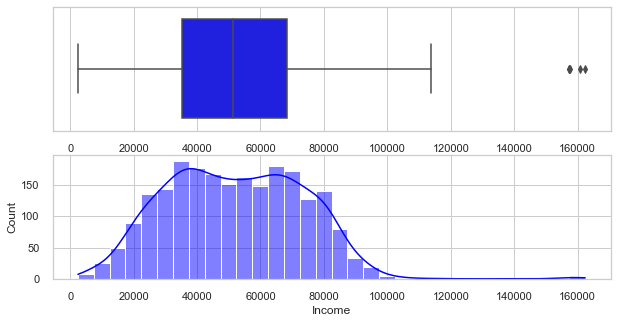

In [249]:
# Recheck

fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = df, x = 'Income', color = 'blue', ax = axes[0])
sns.histplot(data = df, x = 'Income', kde=True, color='blue', ax = axes[1])

plt.show()

In [250]:
# view outliers in age
from scipy import stats
income_outliers = df[(np.abs(stats.zscore(df['Age'])) >= 3)]
income_outliers

ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  higherEdu         Single  36640.0        1         0   
239  11004        1893  higherEdu         Single  60182.0        0         1   
339   1150        1899  higherEdu   Relationship  83532.0        0         0   

    Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
192  2013-09-26       99     15       6     8     7       4    25   
239  2014-05-17       23      8       0     5     7       0     2   
339  2013-09-26       36    755     144   562   104      64   224   

     NumDealsPurchases  Web  Catalog  Store  NumWebVisitsMonth  AcceptedCmp3  \
192                  1    2        1      2                  5             0   
239                  1    1        0      2                  4             0   
339                  1    4        6      4                  1             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
192             0             0             0             0         1   
239             0             0             0             0         0   
339             0             1             0             0         0   

     Response  family_size  Expenses  TotalAcceptedCmp  kids  parent  \
192         0            2        65                 0     1       1   
239         0            2        22                 0     1       1   
339         0            2      1853                 1     0       0   

     total_purchases  Custom_days  Age  
192                5          436  122  
239                3          203  129  
339               14          436  123

In [251]:
# Assuming that the three age outliers are data input erros (could have added a 1 in front of actual age), will replace with mean
#df[df['Age']>120]
median = df.loc[df['Age']<100, 'Age'].median()
df["Age"] = np.where(df["Age"] >100, median,df['Age'])

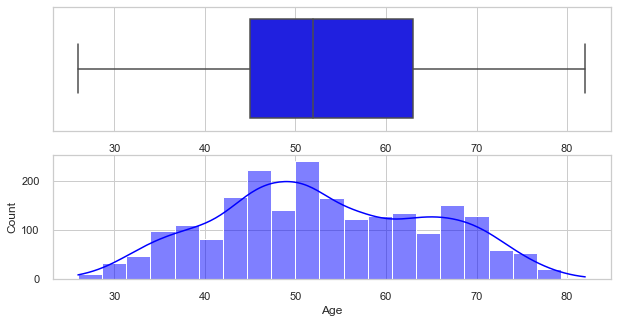

In [252]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = df, x = 'Age', color = 'Blue', ax = axes[0])
sns.histplot(data = df, x = 'Age', kde=True, color='blue', ax = axes[1])
plt.show()

<Figure size 432x288 with 0 Axes>

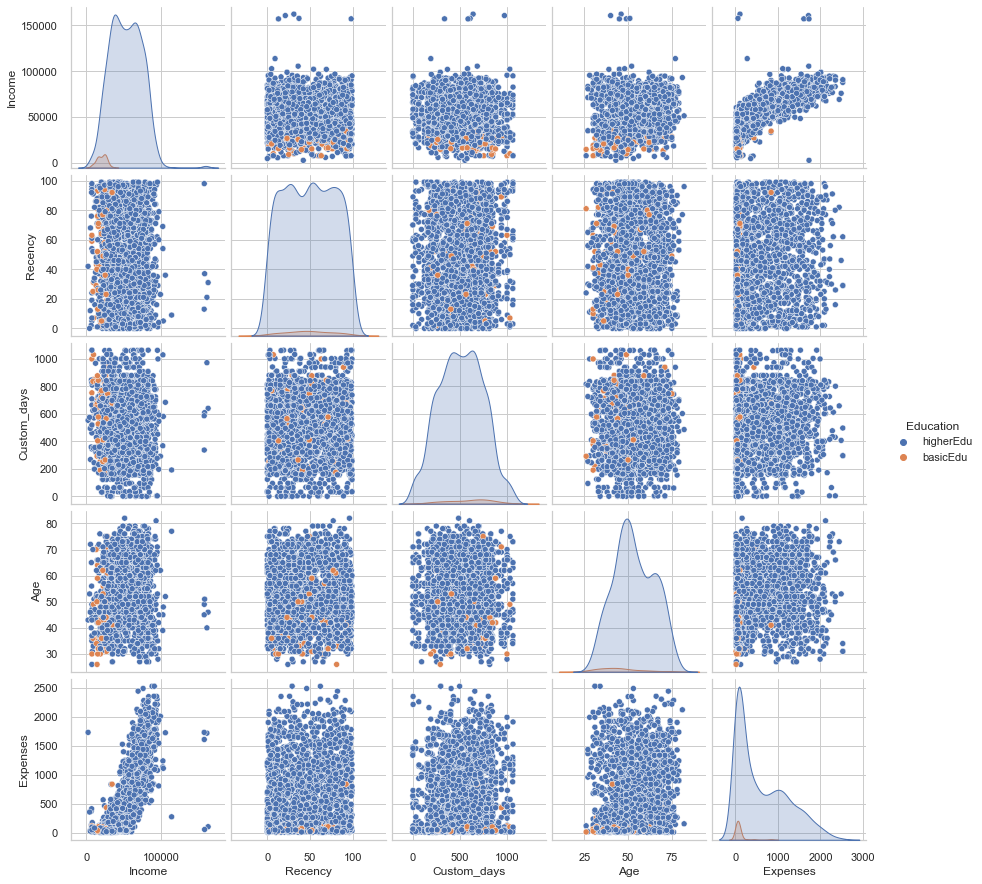

In [253]:
#To plot some selected features 
sns.set_style('whitegrid')
#Plotting following features
columns = [ "Income", "Recency", "Custom_days", "Age", "Expenses",'Education']

plt.figure()
sns.pairplot(df[columns], hue= 'Education') # plot values with colour differentating whether customer has kids at home 
plt.show()

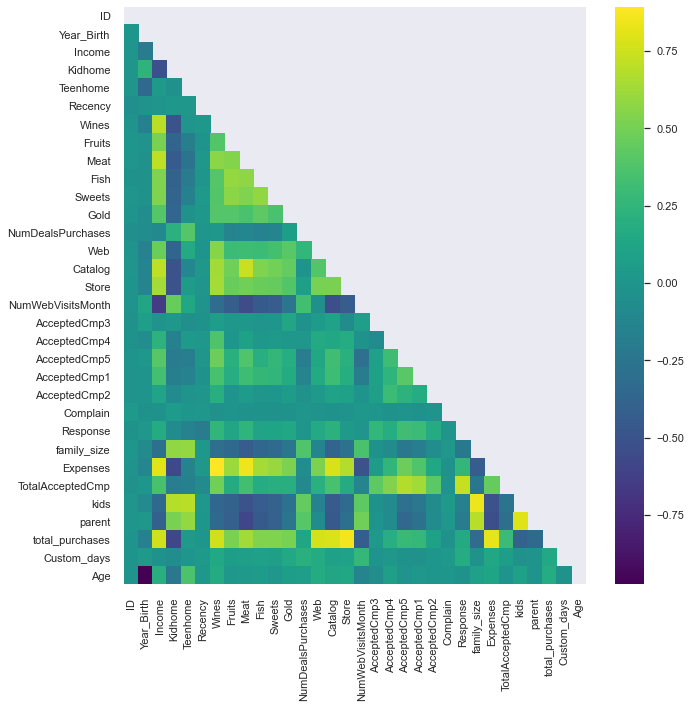

In [254]:
# Re-create heatmap to analyse correlation between the feature columns
sns.set(style="darkgrid")
corr=df.corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("viridis", as_cmap=True) #sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap=cmap, ax=ax,mask=mask) #annot=True
f.tight_layout()

<li>Interesting that web visit per month has a negative correlation with Income and Expenses
<li>Very high correlation with Expenses and Income
<li>Negative correlatin between having kids at home and Expenses (and Income)
<li>Almost no correlation between Marital_Status/Recency/TOtalDealsPurchased and any other feature

# Data Prepocessing

In [255]:
# drop three columns that are no longer needed
df=df.drop(columns=["ID", "Dt_Customer", "Year_Birth"],axis=1) 
df.shape

(2209, 32)

In [256]:
# create list to identify any non-numeric features.  Will have to transform them to be readable by ML model
object_list = []
for i in df.columns:
    if df[i].dtypes == "object":
        object_list.append(i)

print(object_list)

['Education', 'Marital_Status']


In [257]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in object_list:
    df[i]=df[[i]].apply(encoder.fit_transform)
    print(df[i].value_counts())
df.sample(3)

1    2155
0      54
Name: Education, dtype: int64
0    1427
1     782
Name: Marital_Status, dtype: int64


Education  Marital_Status   Income  Kidhome  Teenhome  Recency  Wines  \
466           1               0  75261.0        0         0       17   1239   
993           1               1  64449.0        1         0       70    218   
1765          1               0  67131.0        0         1       72    465   

      Fruits  Meat  Fish  Sweets  Gold  NumDealsPurchases  Web  Catalog  \
466       17   413    23      34    17                  1    5        6   
993       63   282   137      35    70                  4    5        3   
1765      71   250    93      35    62                  3    9        2   

      Store  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
466       5                  2             0             1             1   
993      12                  4             0             0             0   
1765     12                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  family_size  Expenses  \
466              0             0         0         1            2      1743   
993              0             0         0         0            2       805   
1765             0             0         0         0            3       976   

      TotalAcceptedCmp  kids  parent  total_purchases  Custom_days   Age  
466                  3     0       0               16          592  67.0  
993                  0     1       1               20          291  33.0  
1765                 0     1       1               23          620  66.0

### Normalise Data

In [258]:
from sklearn.preprocessing import StandardScaler

In [259]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'Web', 'Catalog', 'Store', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'family_size', 'Expenses',
       'TotalAcceptedCmp', 'kids', 'parent', 'total_purchases', 'Custom_days',
       'Age'],
      dtype='object')

In [260]:
all_cols = ['Income','Recency','NumDealsPurchases','NumWebVisitsMonth',
                'TotalAcceptedCmp','Kidhome','Teenhome','Custom_days','Age','family_size',
                'Wines','Fruits','Meat','Fish','Sweets','Gold','Web','Catalog','Store','total_purchases','Expenses',
                'Marital_Status','Education','parent','Complain']

In [261]:
data = df[all_cols].copy()
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns= data.columns )
scaled_data.head()

Income   Recency  NumDealsPurchases  NumWebVisitsMonth  TotalAcceptedCmp  \
0  0.290892  0.310670           0.363069           0.715789          0.615725   
1 -0.264782 -0.380125          -0.167367          -0.127731         -0.503729   
2  0.925765 -0.794602          -0.697803          -0.549491         -0.503729   
3 -1.192852 -0.794602          -0.167367           0.294029         -0.503729   
4  0.298195  1.554101           1.423942          -0.127731         -0.503729   

    Kidhome  Teenhome  Custom_days       Age  family_size     Wines    Fruits  \
0 -0.822923 -0.930876     1.973596  1.019308    -1.763048  0.975086  1.545998   
1  1.039614  0.906752    -1.668222  1.275780     0.448521 -0.874590 -0.638571   
2 -0.822923 -0.930876    -0.174474  0.335383    -0.657263  0.355563  0.566708   
3  1.039614 -0.930876    -1.926507 -1.288938     0.448521 -0.874590 -0.563241   
4  1.039614 -0.930876    -0.824491 -1.032466     0.448521 -0.394385  0.416048   

       Meat      Fish    Sweets      Gold       Web   Catalog     Store  \
0  1.686670  2.450287  1.481417  0.847024  1.426435  2.501036 -0.561024   
1 -0.719758 -0.652521 -0.635319 -0.734987 -1.131784 -0.573605 -1.178206   
2 -0.180540  1.336927 -0.148713 -0.040446  1.426435 -0.231978  1.290523   
3 -0.657369 -0.506506 -0.586659 -0.754280 -0.766324 -0.915232 -0.561024   
4 -0.220647  0.150559 -0.002732 -0.561352  0.330055  0.109648  0.056158   

   total_purchases  Expenses  Marital_Status  Education    parent  Complain  
0         1.309385  1.672294        1.350855   0.158297 -1.584905 -0.097968  
1        -1.196331 -0.965425        1.350855   0.158297  0.630953 -0.097968  
2         1.030972  0.277123       -0.740272   0.158297 -1.584905 -0.097968  
3        -0.917918 -0.922292       -0.740272   0.158297  0.630953 -0.097968  
4         0.195733 -0.310143       -0.740272   0.158297  0.630953 -0.097968

### PCA
<br> Deal with multicollinearity and dimensionality reduction

In [262]:
# find out how many components to create for PCA
covar_matrix = PCA(n_components = len(scaled_data.columns)) #components are equal to the number of features we have
covar_matrix.fit(scaled_data)

PCA(n_components=25)

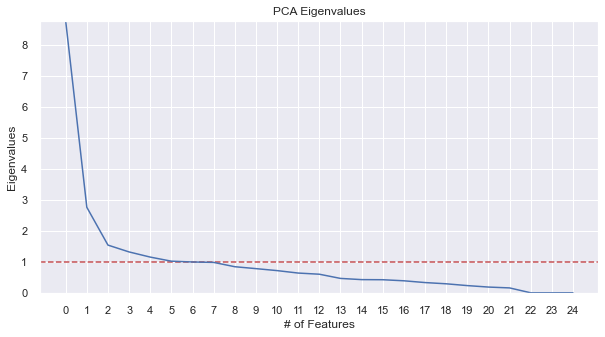

In [263]:
plt.figure(figsize=(10,5))
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
x = range(25)
plt.xticks(x)
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

In [264]:
# confirm Kaiser Rule (six eigenvalues over 1)
x =covar_matrix.explained_variance_ > 1
print(x)

[ True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False]


In [265]:
# look at explained variance ratio for each feature
covar_matrix.explained_variance_ratio_.round(4)*100

array([35.07, 11.03,  6.16,  5.27,  4.61,  4.08,  3.98,  3.92,  3.37,
        3.12,  2.86,  2.55,  2.4 ,  1.86,  1.7 ,  1.69,  1.55,  1.32,
        1.16,  0.93,  0.74,  0.63,  0.  ,  0.  ,  0.  ])

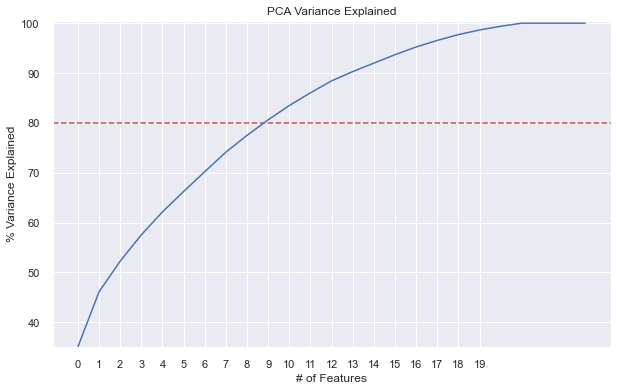

In [266]:
# Check to see that something less than the total number of features explains a large portion of the variance (aim for 80%)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=5)*100)
plt.figure(figsize=(10,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5) 
x = range(20)
plt.xticks(x)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [267]:
covar_matrix.explained_variance_ratio_[:6].sum()*100

66.2255001311972

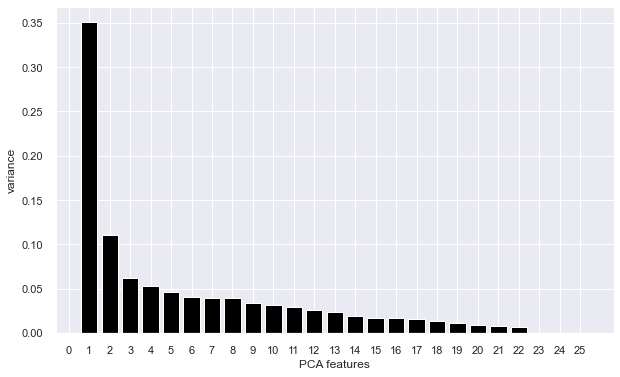

In [268]:
plt.figure(figsize=(10,6))
features = range(1,26) 
plt.bar(features, covar_matrix.explained_variance_ratio_[:], color='black')
plt.xlabel('PCA features')
plt.ylabel('variance')
x = range(26)
plt.xticks(x)
plt.show()

Will run PCA with 6 principal components in line with Kaiser Rule.  This will reduce dimensionality from 25 to 6 features, remove multicollinearity issues but will also mean that we loose some information contained in the original dataset (six PC's only explain 67% of the dataset variance)

In [269]:
#Initiating PCA to reduce dimentions aka features to 8 
pca = PCA(n_components=6)
pca.fit(scaled_data)
data_pca = pd.DataFrame(pca.transform(scaled_data), columns=(["PCA1","PCA2", "PCA3","PCA4","PCA5","PCA6"]))
data_pca.describe().T

count          mean       std       min       25%       50%       75%  \
PCA1  2209.0  2.030467e-17  2.961873 -5.174548 -2.748209 -0.758046  2.555816   
PCA2  2209.0  6.915649e-17  1.661224 -4.599691 -1.292045 -0.186890  1.233308   
PCA3  2209.0  7.342851e-17  1.240787 -3.197892 -0.853197 -0.020856  0.819935   
PCA4  2209.0 -3.555830e-17  1.148439 -3.016001 -0.781552  0.042674  0.884597   
PCA5  2209.0 -2.759223e-17  1.073587 -3.929846 -0.619832 -0.066985  0.550012   
PCA6  2209.0  4.741316e-17  1.010169 -3.419750 -0.379745 -0.013511  0.306161   

           max  
PCA1  8.040061  
PCA2  5.550391  
PCA3  6.009224  
PCA4  3.234192  
PCA5  4.948129  
PCA6  9.125998

In [270]:
# look at makeup of principal components
components = pd.DataFrame(covar_matrix.components_ ,columns = scaled_data.columns)
components.rename(index = lambda x: 'PC-' + str(x + 1), inplace=True)

# Top 4 positive contributors
comp = pd.DataFrame(components.columns.values[np.argsort(-components.values, axis=1)[:, :4]], 
                  index=components.index,
                  columns = ['1st Max','2nd Max','3rd Max','4th Max'])
comp.head(6)

1st Max            2nd Max            3rd Max         4th Max
PC-1          Expenses    total_purchases             Income         Catalog
PC-2          Teenhome  NumDealsPurchases        family_size          parent
PC-3       Custom_days  NumWebVisitsMonth  NumDealsPurchases  Marital_Status
PC-4       family_size            Kidhome             Fruits            Fish
PC-5  TotalAcceptedCmp              Wines          Education        Expenses
PC-6          Complain          Education            Recency         Kidhome

In [271]:
components = pd.DataFrame(covar_matrix.components_ ,columns = scaled_data.columns)
components.head()
# eigenvector per each PC
data_pca6 = pd.DataFrame(pca.components_,
                         columns=scaled_data.columns,
                         index = ['PC1','PC2','PC3','PC4','PCA5','PCA6']).T

data_pca6.round(3)

PC1    PC2    PC3    PC4   PCA5   PCA6
Income             0.285  0.093 -0.200 -0.011  0.101  0.059
Recency            0.002  0.016 -0.024  0.063 -0.395  0.343
NumDealsPurchases -0.046  0.409  0.250  0.039 -0.070  0.005
NumWebVisitsMonth -0.212  0.153  0.434 -0.015  0.066 -0.000
TotalAcceptedCmp   0.141 -0.036  0.186 -0.075  0.626  0.108
Kidhome           -0.230  0.027  0.094  0.284  0.109  0.159
Teenhome          -0.063  0.464 -0.230 -0.202 -0.108 -0.060
Custom_days        0.032  0.131  0.528  0.089 -0.133  0.044
Age                0.049  0.214 -0.315 -0.372 -0.089 -0.048
family_size       -0.187  0.373 -0.208  0.378  0.109  0.007
Wines              0.264  0.155  0.090 -0.081  0.270  0.049
Fruits             0.229 -0.059 -0.011  0.212 -0.233 -0.034
Meat               0.276 -0.076 -0.020  0.136  0.071  0.087
Fish               0.238 -0.070 -0.010  0.210 -0.224 -0.052
Sweets             0.229 -0.044 -0.007  0.207 -0.213 -0.035
Gold               0.190  0.095  0.151  0.059 -0.159 -0.094
Web                0.187  0.308  0.204 -0.087 -0.018 -0.060
Catalog            0.278  0.040 -0.017  0.046  0.071  0.053
Store              0.250  0.173 -0.019 -0.027 -0.098 -0.040
total_purchases    0.297  0.212  0.062 -0.027 -0.023 -0.019
Expenses           0.319  0.053  0.054  0.057  0.114  0.042
Marital_Status     0.023 -0.147  0.238 -0.626 -0.207  0.096
Education          0.052  0.133 -0.230 -0.103  0.182  0.383
parent            -0.212  0.345 -0.012  0.012 -0.044  0.005
Complain          -0.013  0.004  0.025  0.020 -0.107  0.802

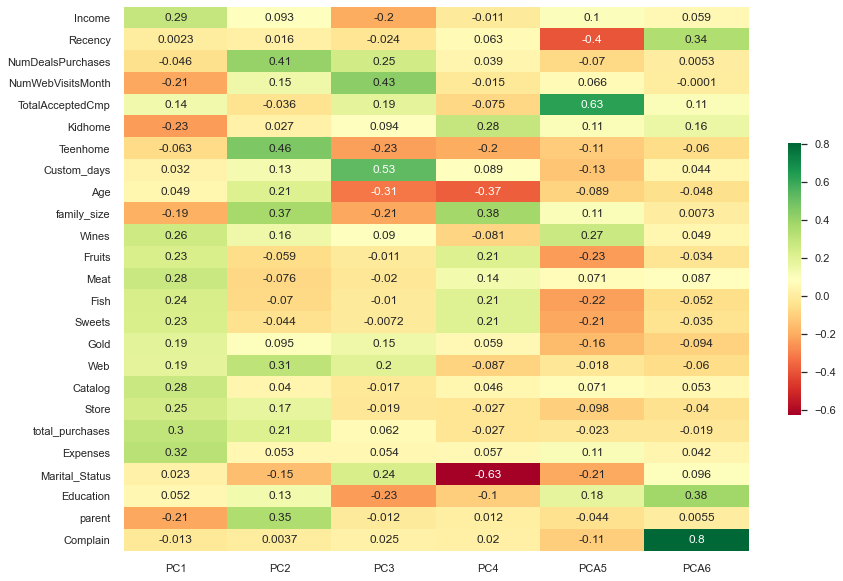

In [272]:
# heatmap for each loading(value of the elements of eigenvector against each principal component.)

plt.figure(figsize=(14, 10))
sns.heatmap(data_pca6,
            annot=True,
            cmap= 'RdYlGn',
            cbar_kws={'shrink' : 0.5}           
           )

plt.show()

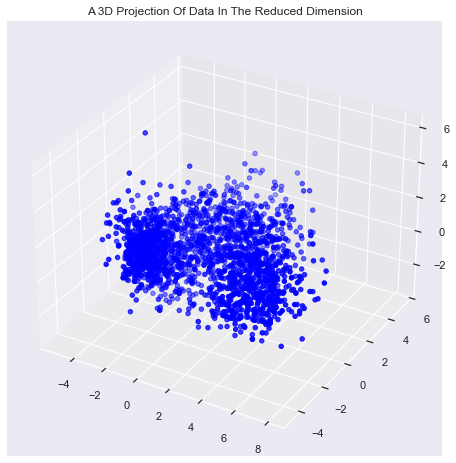

In [273]:
#A 3D Projection Of Data In The Reduced Dimension
x =data_pca["PCA1"]
y =data_pca["PCA2"]
z =data_pca["PCA3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

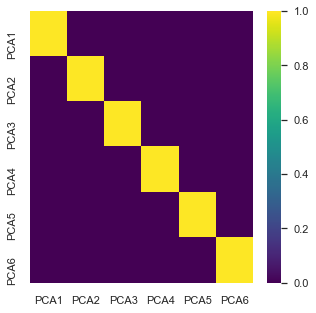

In [274]:
# Create heatmap to analyse correlation between the feature columns after PCA

plt.figure(figsize=(5,5))
sns.heatmap(data_pca.corr(), annot=False, cmap = 'viridis')
plt.show()

# Clustering

#### run data through multiple clustering algorithms to visually determine which methods might fit the data best without tuning any hyperparameters

In [275]:
# data to use for clustering (3 clusters)
prepared_data = data_pca.copy()

C:\Users\CGSIAHA\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:250: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.



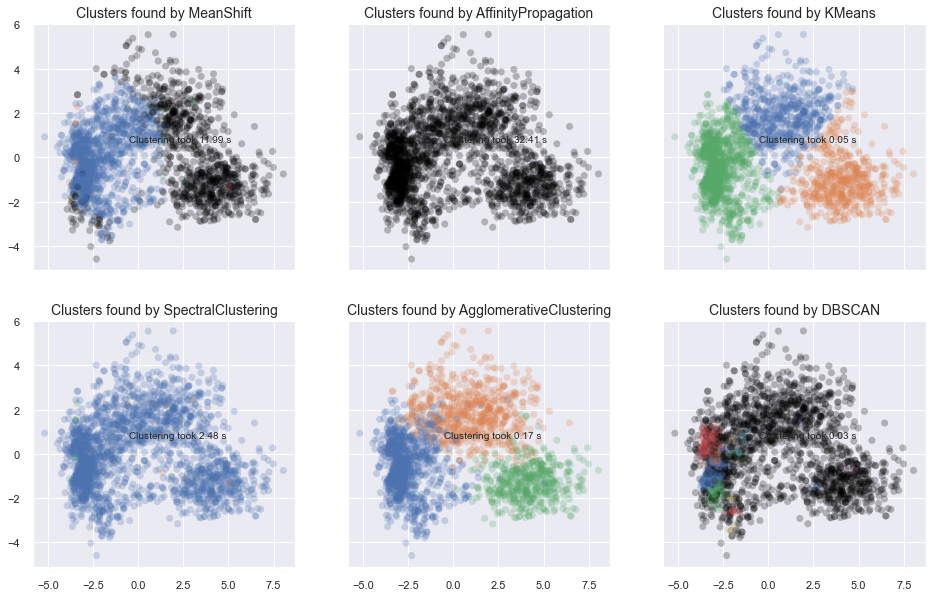

In [276]:
from sklearn.cluster import Birch
import sklearn.cluster as cluster
import time
plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}
clusters_series = []

def plot_clusters(data, algorithms, args, kwds, axs):
    for j, i in enumerate(axs):
        algorithm = algorithms[j]
        start_time = time.time()
        labels = algorithm(**kwds[j]).fit_predict(data) #*args[j],
        end_time = time.time()
        clusters_series.append(labels)
        #plotting
        palette = sns.color_palette('deep', np.unique(labels).max() + 1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]        
        i.scatter(data.iloc[:,0], data.iloc[:,1],c=colors,  **plot_kwds)
        i.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)
        i.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=10)
            
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharex=True, sharey=True)
axs = axs.flatten()
data_alg = [cluster.MeanShift, cluster.AffinityPropagation , cluster.KMeans, 
           cluster.SpectralClustering, cluster.AgglomerativeClustering, cluster.DBSCAN]
data_arg = [(0.475,), (), (), (), (), ()]
data_kwd = [{'cluster_all':False}, {'preference':-1.0, 'damping':0.95}, {'n_clusters':3},
           {'n_clusters':3}, {'n_clusters':3, 'linkage':'ward'}, {'eps':0.605}]

plot_clusters(data=prepared_data, algorithms=data_alg, args=data_arg, kwds=data_kwd, axs=axs)

p_data = prepared_data.copy()
df_f = df.copy()
p_data["clusters_affinity"], p_data["clusters_spectral"] =  clusters_series[1],clusters_series[3]
p_data["clusters_kmeans"], p_data["clusters_agglom"] =   clusters_series[2],clusters_series[4]

df_f["clusters_affinity"], df_f["clusters_spectral"] =  clusters_series[1],clusters_series[3]
df_f["clusters_kmeans"], df_f["clusters_agglom"] =   clusters_series[2],clusters_series[4]

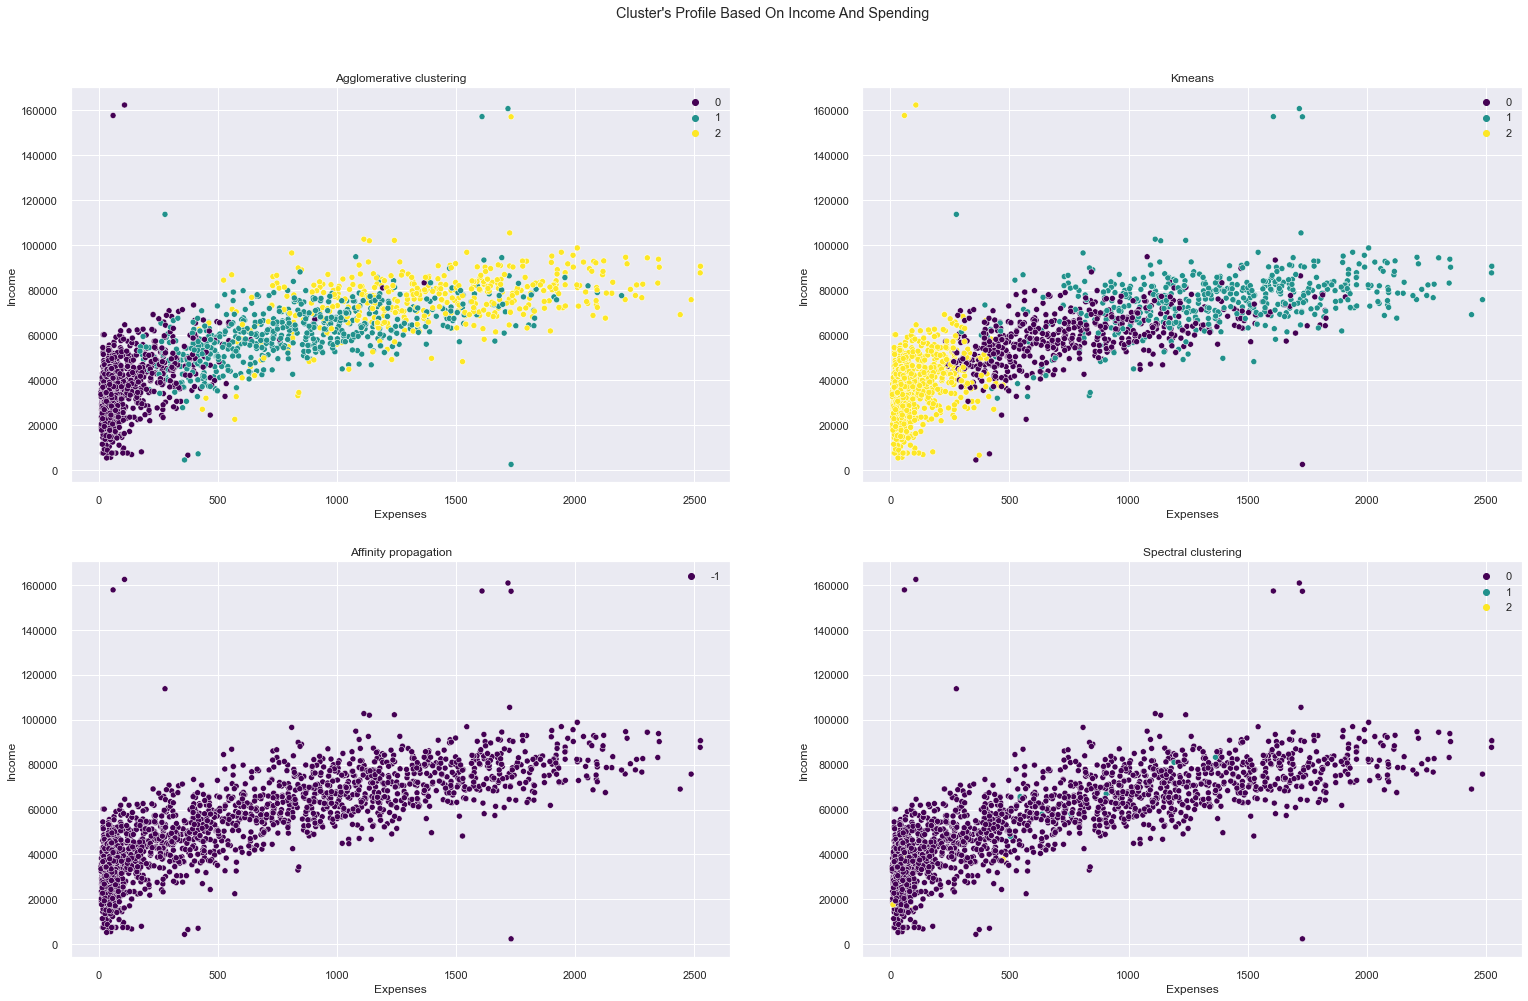

In [277]:
fig, ax = plt.subplots(2,2, figsize=(26,16))
ax = ax.flatten()
data, titles = ["clusters_agglom", "clusters_kmeans", "clusters_affinity","clusters_spectral"],["Agglomerative clustering", "Kmeans", "Affinity propagation","Spectral clustering"]

for j, i in enumerate(ax):
    sns.scatterplot(data = df_f,x=df_f["Expenses"], y=df_f["Income"],hue=df_f[data[j]], ax=i, palette="viridis")
    i.set_title(titles[j])
    i.legend()
    plt.suptitle("Cluster's Profile Based On Income And Spending", y=0.95);

Seems that on first glance that K-Means and Agglomerative clustering might give us the best defined clusters.  This fits with what the literature says in terms of the algorithms of choice for customer segmentation

#### K-Means: finding k using elbow method, silhouette score and Calinksi Harabasz score

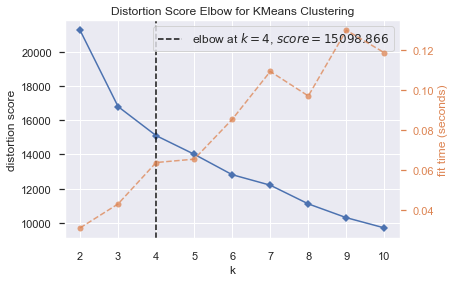

In [278]:
km = KMeans(init='k-means++')
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(data_pca)
Elbow_M.show()

plt.show()

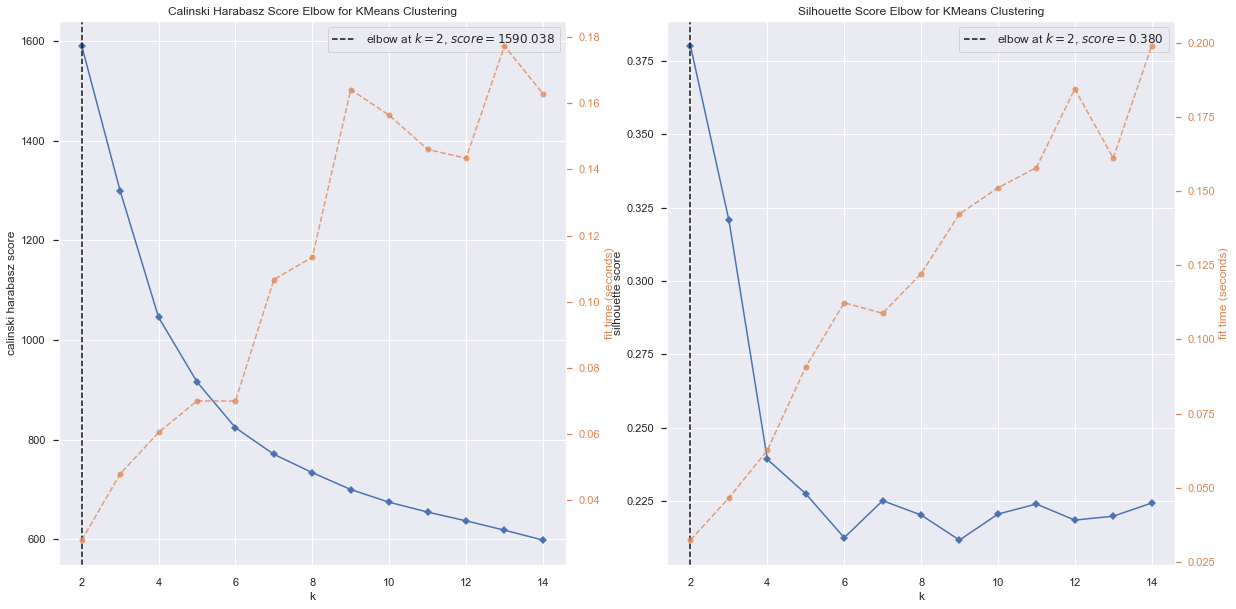

In [279]:
# Calinski_harabasz Scoring Matrix
plt.figure(figsize=(20,10))

plt.subplot(121)
visualizer = KElbowVisualizer(estimator = km, k=(2,15), metric='calinski_harabasz')
visualizer.fit(data_pca)        # Fit the data to the visualizer
visualizer.finalize()

# Silhouette Scoring Matrix
plt.subplot(122)
visualizer = KElbowVisualizer(estimator = km, k=(2,15), metric='silhouette')
visualizer.fit(data_pca)        # Fit the data to the visualizer
visualizer.finalize()
plt.show()

The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters. I also use these 2 metrics to get clusters.

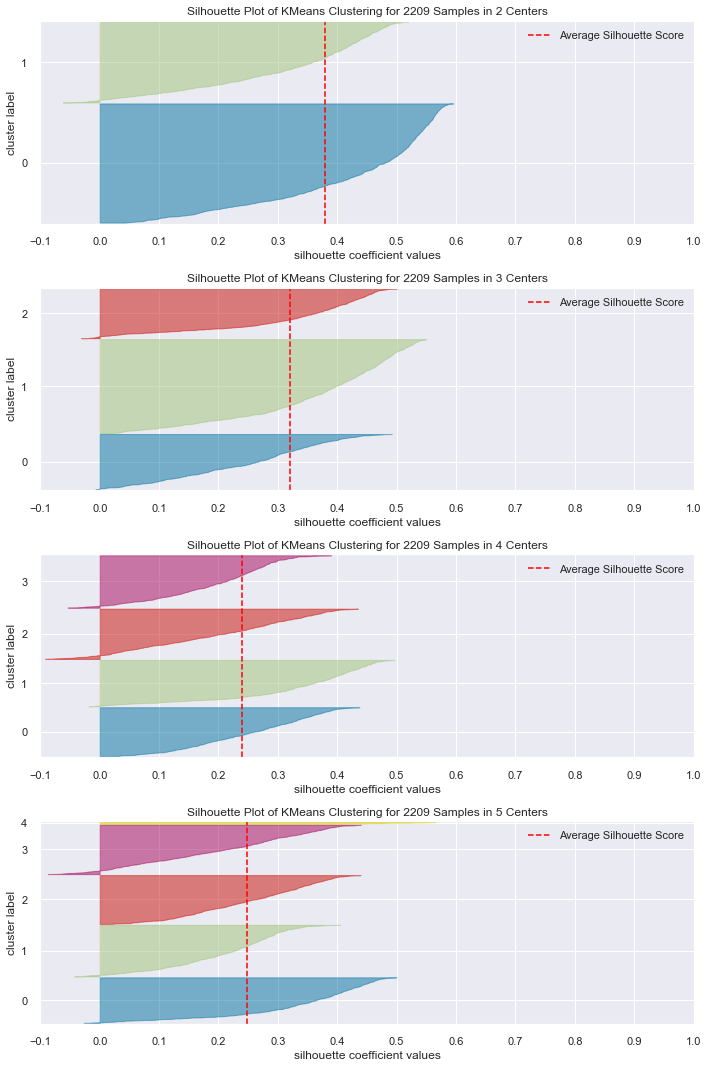

In [280]:
# visualise silhouette score differently to see if there are any negative values
k_range = range(2, 6)
fig, axes = plt.subplots(4, 1, figsize=(10, 15))

for i in k_range:   
    model = KMeans(i, init='k-means++', n_init=100, random_state=101)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-2])
    visualizer.fit(data_pca)
    visualizer.finalize()
    axes[i-2].set_xlim(-0.1, 1)
    
plt.tight_layout()

K-Means: optimal k will be three based on the above tests.  Although the elbow method selected k=4, both the silhouette score and Calinski_harabasz selected k=2, with only a small fall in value for a k=3.  Therefore, it is logical to split the difference in the scores and select k=3

#### Use iterative process to determine best hyperparameters

In [281]:
import statistics
from sklearn.metrics import silhouette_samples, silhouette_score

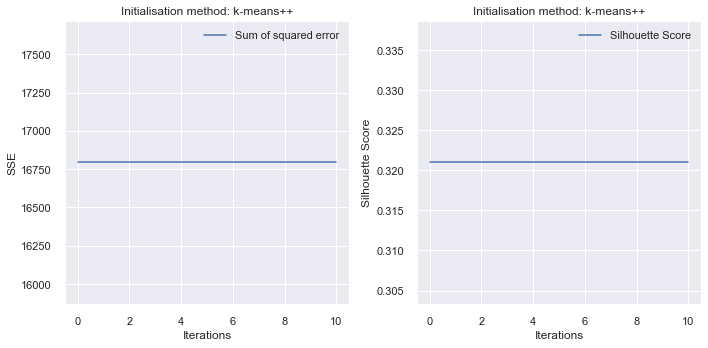

Silhouette Score Mode is:  0.321 
Inertia Mode is:  16795


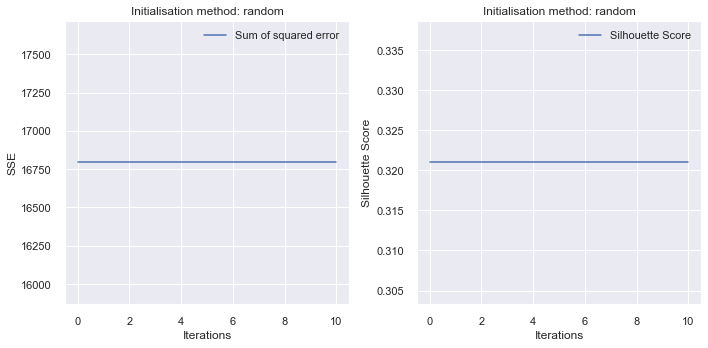

Silhouette Score Mode is:  0.321 
Inertia Mode is:  16795


In [282]:
initialisation = ['k-means++','random'] # determines how clusters centriods are first computed

for p in initialisation:
    ss = []
    inertia = []
    for i in range (11):
        kmeans = KMeans(n_clusters=3, init= p) #init = 'random',init='k-means++'
        kmeans.fit(prepared_data)
        cluster_labels = kmeans.fit_predict(prepared_data)
        silhouette_avg = silhouette_score(prepared_data, cluster_labels)
        ss.append(silhouette_avg.round(3))
        inertia.append(round(kmeans.inertia_)) # Inertia: Sum of distances of samples to their closest cluster center

    fig = plt.figure(figsize=(10,5))
    fig.add_subplot(121)
    plt.plot(range(11), inertia,'b-',label='Sum of squared error')
    plt.xlabel("Iterations")
    plt.ylabel("SSE")
    plt.title('Initialisation method: {}'.format(p))
    plt.legend()
    fig.add_subplot(122)
    plt.plot(range(11), ss,'b-',label='Silhouette Score')
    plt.xlabel("Iterations")
    plt.ylabel("Silhouette Score")
    plt.title('Initialisation method: {}'.format(p))
    plt.legend()
    plt.tight_layout()
    plt.show()
    print("Silhouette Score Mode is: ",statistics.mode(ss) ,"\nInertia Mode is: ",statistics.mode(inertia))

No difference in model performance by changing the initialisation method

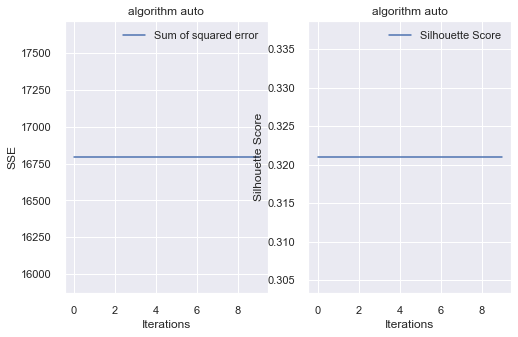

[array([ 552,  617, 1040], dtype=int64), array([ 617,  552, 1040], dtype=int64), array([ 552,  617, 1040], dtype=int64), array([ 552, 1040,  617], dtype=int64), array([1040,  552,  617], dtype=int64), array([ 617,  552, 1040], dtype=int64), array([ 615, 1042,  552], dtype=int64), array([ 552, 1040,  617], dtype=int64), array([1040,  552,  617], dtype=int64), array([ 552, 1040,  617], dtype=int64)]


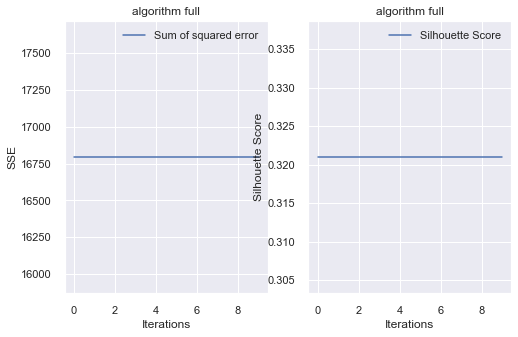

[array([1040,  552,  617], dtype=int64), array([1040,  552,  617], dtype=int64), array([ 617,  552, 1040], dtype=int64), array([ 615, 1042,  552], dtype=int64), array([ 617,  552, 1040], dtype=int64), array([ 617, 1040,  552], dtype=int64), array([ 552, 1041,  616], dtype=int64), array([1040,  552,  617], dtype=int64), array([1040,  552,  617], dtype=int64), array([1040,  552,  617], dtype=int64)]


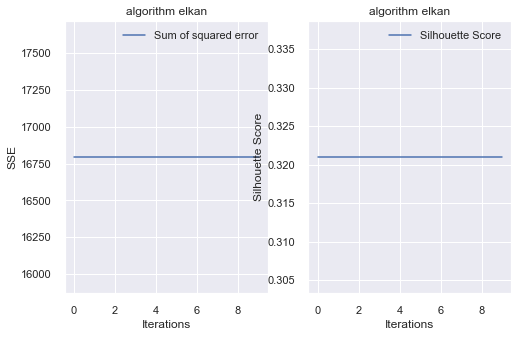

[array([1040,  552,  617], dtype=int64), array([1042,  552,  615], dtype=int64), array([ 617,  552, 1040], dtype=int64), array([ 615,  552, 1042], dtype=int64), array([1040,  617,  552], dtype=int64), array([1042,  615,  552], dtype=int64), array([1040,  617,  552], dtype=int64), array([1040,  617,  552], dtype=int64), array([ 552,  617, 1040], dtype=int64), array([1042,  552,  615], dtype=int64)]


In [283]:
algo = ["auto", "full", "elkan"]

for a in algo:
    ss = []
    inertia = []
    bin_count = []
    for i in range (10):
        kmeans = KMeans(n_clusters=3, init= 'k-means++', algorithm = a) #
        kmeans.fit(prepared_data)
        cluster_labels = kmeans.fit_predict(prepared_data)
        silhouette_avg = silhouette_score(prepared_data, cluster_labels)
        ss.append(silhouette_avg.round(3))
        inertia.append(round(kmeans.inertia_)) # Inertia: Sum of distances of samples to their closest cluster center
        bin_count.append(np.bincount(kmeans.labels_))
        
        
    fig = plt.figure(figsize=(8,5))
    fig.add_subplot(121)
    plt.plot(range(10), inertia,'b-',label='Sum of squared error')
    plt.xlabel("Iterations")
    plt.ylabel("SSE")
    plt.title("algorithm {}".format(a))
    plt.legend()
    fig.add_subplot(122)
    plt.plot(range(10), ss,'b-',label='Silhouette Score')
    plt.xlabel("Iterations")
    plt.ylabel("Silhouette Score")
    plt.title("algorithm {}".format(a))
    plt.legend()
    plt.show()
    print(bin_count)

No difference in algorithm to use for Kmeans so will use 'Full' option with is an Expectation Maximisation (EM) algorithm <br> Can also say that stability and consistency of the model is scarily high - see absolutley no change in the outputs when any of the hyperparameters are altered (aside from cluster size)

### Hierachial Clustering (Agglomerative)

For n_clusters = 2 The average silhouette_score is : 0.32238319331793786
For n_clusters = 3 The average silhouette_score is : 0.30348412920821466
For n_clusters = 4 The average silhouette_score is : 0.31554204613707376
For n_clusters = 5 The average silhouette_score is : 0.2419642473747126
For n_clusters = 6 The average silhouette_score is : 0.20912481135984629
For n_clusters = 7 The average silhouette_score is : 0.20592778122597666
For n_clusters = 8 The average silhouette_score is : 0.1732740141450557
For n_clusters = 9 The average silhouette_score is : 0.175605326128627
For n_clusters = 10 The average silhouette_score is : 0.1888729505926745


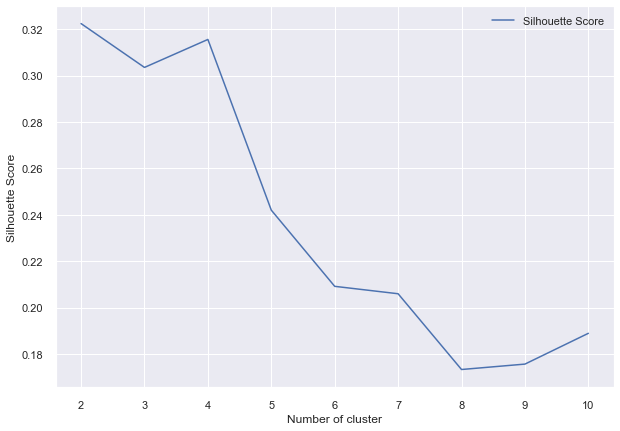

In [284]:
from sklearn.cluster import AgglomerativeClustering
#clusterer.distances_
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', 
                                        linkage='ward',compute_distances = True)
    cluster_labels = clusterer.fit_predict(prepared_data)
    #Finding the average silhouette score
    silhouette_avg = silhouette_score(prepared_data, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

fig = plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

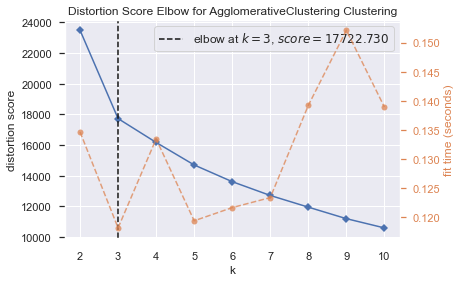

In [285]:
model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
Elbow_M = KElbowVisualizer(estimator =model, k = 10)
Elbow_M.fit(prepared_data)
Elbow_M.show()

plt.show()

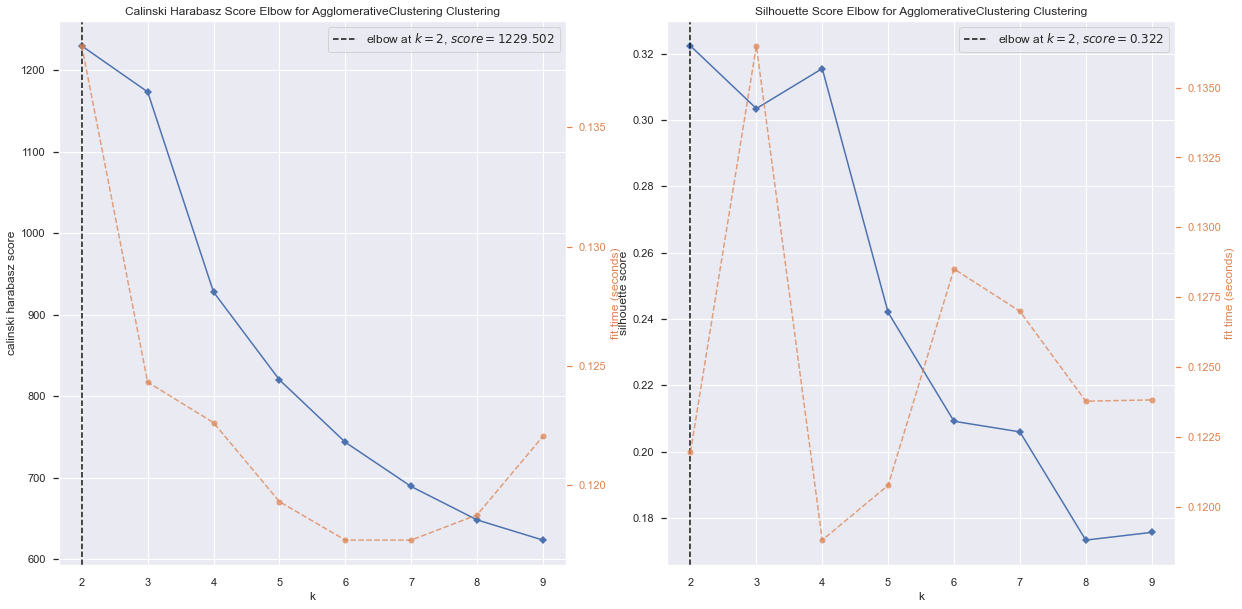

In [286]:
# Calinksi Harabasz score and Silhouette Score
model = AgglomerativeClustering(affinity='euclidean', linkage='ward')#KMeans(init='k-means++', random_state=101)
plt.figure(figsize=(20,10))

plt.subplot(121)
visualizer = KElbowVisualizer(estimator = model, k=(2,10), metric='calinski_harabasz')
visualizer.fit(prepared_data)        # Fit the data to the visualizer
visualizer.finalize()

# Silhouette Scoring Matrix
plt.subplot(122)
visualizer = KElbowVisualizer(estimator = model, k=(2,10), metric='silhouette')
visualizer.fit(prepared_data)        # Fit the data to the visualizer
visualizer.finalize()
plt.show()

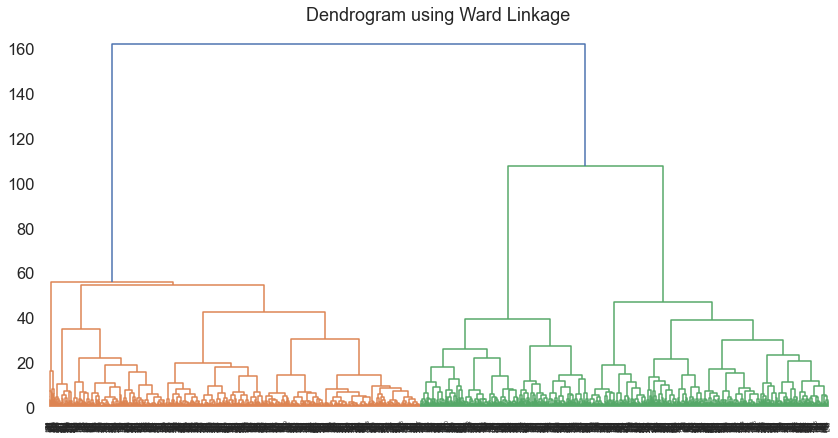

In [379]:
# show dendrogram for ward linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 7))  
plt.title("Dendrogram using Ward Linkage")  
dend = shc.dendrogram(shc.linkage(prepared_data, method='ward'))

A k value of 3 seems to fit best for agglomerative clustering based on the silhouette score, elbow method, dendrogram and Calinski Harabasz Score

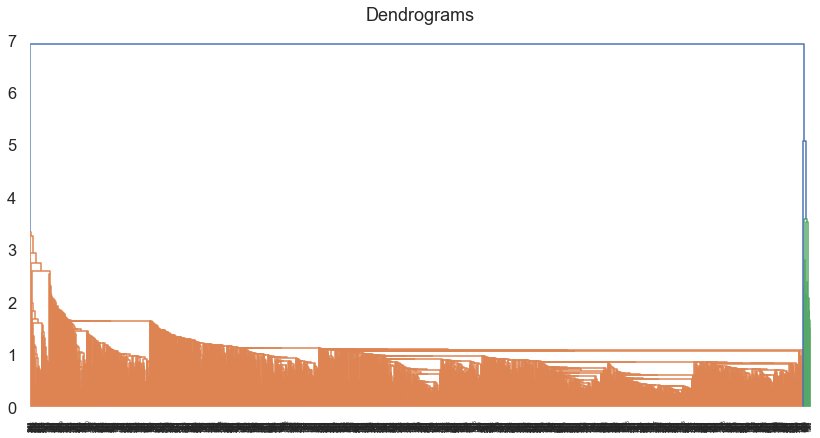

In [380]:
# show dendrogram for single linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(prepared_data, method='single'))

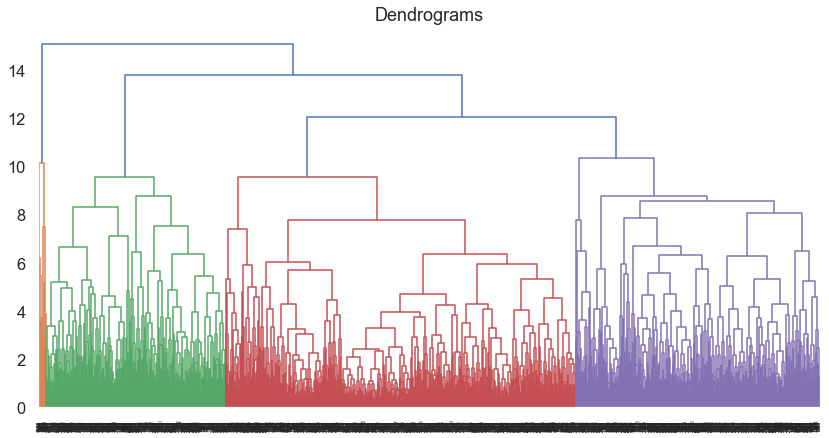

In [381]:
# show dendrogram for complete linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(prepared_data, method='complete'))

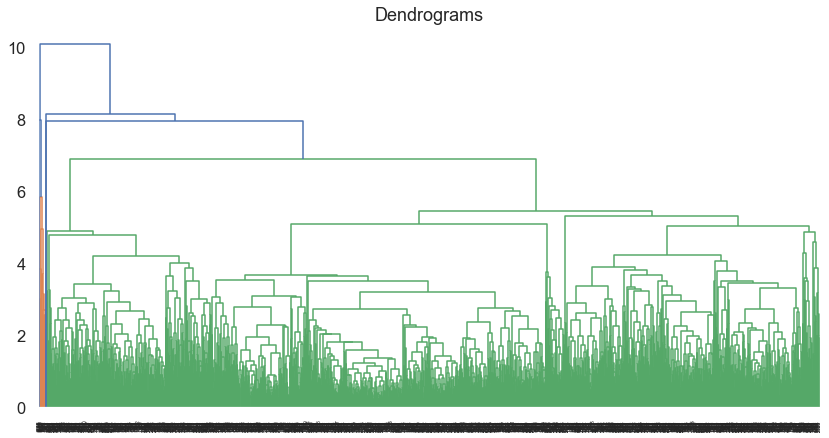

In [382]:
# show dendrogram for average linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(prepared_data, method='average'))

In [287]:
# Find optimal parameters for 3 clusters
aff = ['euclidean', 'manhattan']
distance = ['ward','complete','single','average']
for d in distance:
    if d == 'ward':
        
        clusterer = AgglomerativeClustering(n_clusters=3, affinity= 'euclidean', 
                                                linkage=d,compute_distances = True) # ward can only use euclidean distance
        cluster_labels = clusterer.fit_predict(prepared_data)
        #Finding the average silhouette score
        silhouette_avg = silhouette_score(prepared_data, cluster_labels)
        print(d,silhouette_avg)  
       
    else:
        for affin in aff:
            #iterating through model params
            clusterer = AgglomerativeClustering(n_clusters=3, affinity= affin, 
                                                linkage=d,compute_distances = True)
            cluster_labels = clusterer.fit_predict(prepared_data)
            #Finding the average silhouette score
            silhouette_avg = silhouette_score(prepared_data, cluster_labels)
            print(d,affin,silhouette_avg)         

ward 0.30348412920821466
complete euclidean 0.3573103772124987
complete manhattan 0.32531300355279785
single euclidean 0.4606389115363791
single manhattan 0.4606389115363791
average euclidean 0.3430054532680487
average manhattan 0.4606389115363791


#### Analysis
Ruling out single linkage and average linkage right away because when model is run, no matter if there are 2,3, or 4 clusters the segment sizes are way too lopsided (99% to 1%).  This is also corrobated by the dendrograms above <br><li>2183 data points are always in the same segment and the remaining 21 are split between the other segments<br><br>Also notice that the only difference in distance metric is for complete linkage<br>
<li> Choosing 2, 3 and 4 clusters in model (irrespective of distance metric) for Complete Linkage results in one segment of only 21 customers and is not well defined.  Although Ward has a slightly lower silhouette score, the segments are much more balanced
<li> the 21 data points are all the customers that have complained.  Nothing else about the features in this cluster stand out.  Might consider removing it from the dataset
<li>It seems that all the linkage parameters, aside from Ward, are thrown by a tiny subset of 21 customers. This is corroboated by the dendrograms for each Single, Complete and Average.  Ward is by far the most stable and represents a better fit for the dataset than the others

In [288]:
clusterer = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward',compute_distances = True)  
clusterer.fit_predict(prepared_data)

array([2, 0, 2, ..., 2, 1, 1], dtype=int64)

In [289]:
df_dendro = df.copy()
df_dendro['clusters'] = clusterer.labels_

In [290]:
df_dendro['clusters'].value_counts()

0    1055
1     678
2     476
Name: clusters, dtype: int64

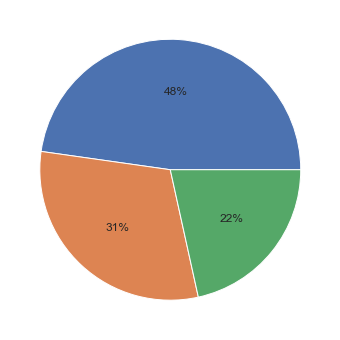

[1055  678  476]


In [291]:
plt.figure(figsize=(6,6))
data = df_dendro['clusters'].value_counts()
#create pie chart
plt.pie(data,  autopct='%.0f%%')
plt.show()
print(np.bincount(clusterer.labels_))

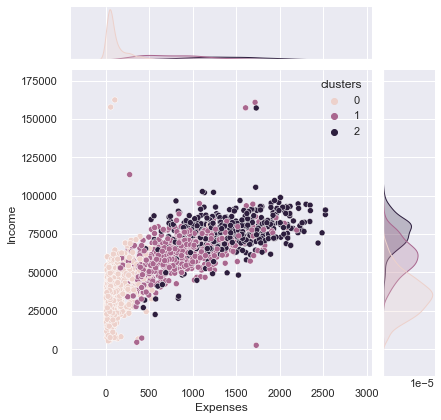

In [292]:
sns.jointplot(x = 'Expenses', y='Income',data =df_dendro, kind = 'scatter', hue = 'clusters' )

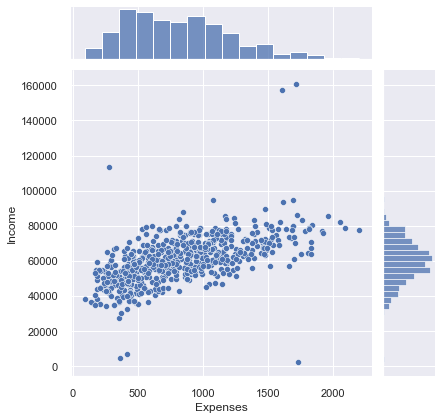

In [293]:
sns.jointplot(x = 'Expenses', y='Income',data =df_dendro[df_dendro['clusters']==1], kind = 'scatter')

C:\Users\CGSIAHA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



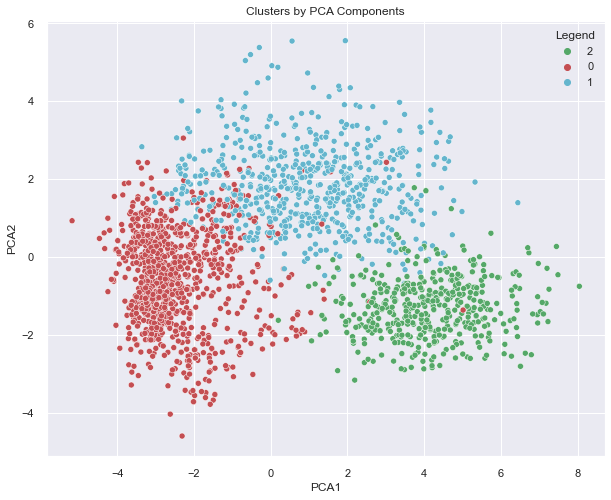

In [294]:
data_pca2 = data_pca.copy()
data_pca2['Segments'] = clusterer.labels_
data_pca2['Legend'] = data_pca2['Segments'].map({0:'0',1:'1', 2:'2'}) 

x_axis = data_pca2['PCA1']
y_axis = data_pca2['PCA2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = data_pca2['Legend'], palette = ['g', 'r', 'c'])   
plt.title('Clusters by PCA Components')
plt.show()

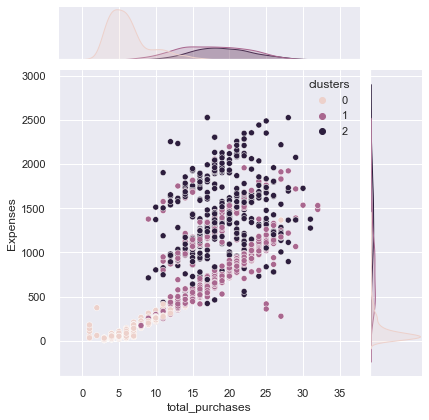

In [295]:
sns.jointplot(x = 'total_purchases', y='Expenses',data =df_dendro, kind = 'scatter', hue = 'clusters' )

C:\Users\CGSIAHA\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

85.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\CGSIAHA\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\CGSIAHA\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



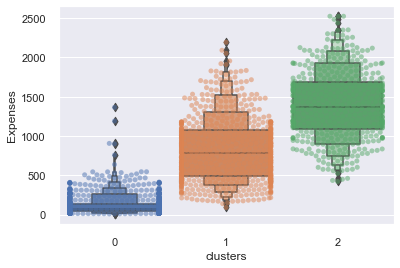

In [296]:
plt.figure()
pl=sns.swarmplot(x=df_dendro["clusters"], y=df_dendro["Expenses"], alpha=0.5 )
pl=sns.boxenplot(x=df_dendro["clusters"], y=df_dendro["Expenses"])
plt.show()

### Guassian Mixure Model

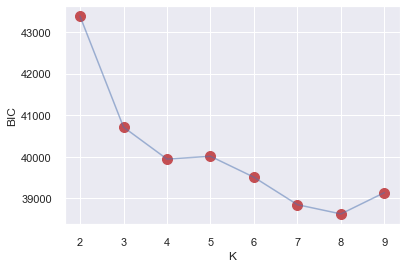

In [297]:
# from https://www.kaggle.com/code/cainanguan/customer-response-predict-personality-analysis
from sklearn.mixture import GaussianMixture

log_like_lst = []
all_cluster = 10

for k in range(2, all_cluster):
    gmm = GaussianMixture(n_components = k).fit(prepared_data)
    log_like = gmm.bic(prepared_data)
    log_like_lst.append(log_like)

#elbow = 8
plt.plot(range(2, all_cluster), log_like_lst, alpha=0.5)
plt.scatter(range(2, all_cluster),log_like_lst, s=100, c='r')
plt.ylabel('BIC')
plt.xlabel('K')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.12181991309166983
For n_clusters = 3 The average silhouette_score is : 0.11096226990807369
For n_clusters = 4 The average silhouette_score is : 0.11935514083199472
For n_clusters = 5 The average silhouette_score is : 0.10445035806926432
For n_clusters = 6 The average silhouette_score is : 0.14660695376165503
For n_clusters = 7 The average silhouette_score is : 0.10473784369592076
For n_clusters = 8 The average silhouette_score is : 0.14109094068716732
For n_clusters = 9 The average silhouette_score is : 0.1355792341331409
For n_clusters = 10 The average silhouette_score is : 0.1168821083570477


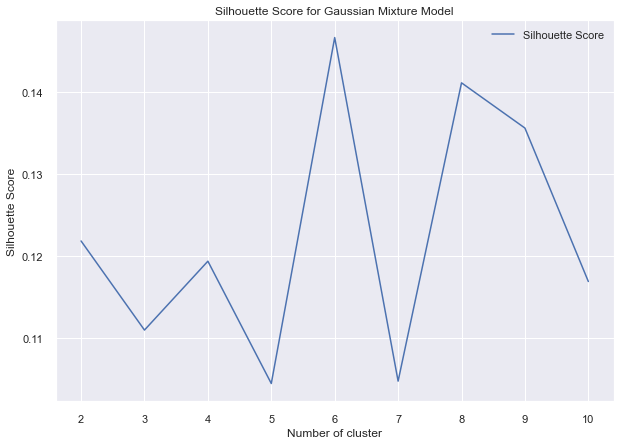

In [298]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
    clusterer = GaussianMixture(n_components = k)#.fit(prepared_data) #random_state = 100
    cluster_labels = clusterer.fit_predict(prepared_data)
    #Finding the average silhouette score
    ss.append(metrics.silhouette_score(prepared_data, cluster_labels, metric='euclidean'))
    silhouette_avg = silhouette_score(prepared_data, cluster_labels)
    #ss.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
   
fig = plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Score for Gaussian Mixture Model')
plt.legend()
plt.show()

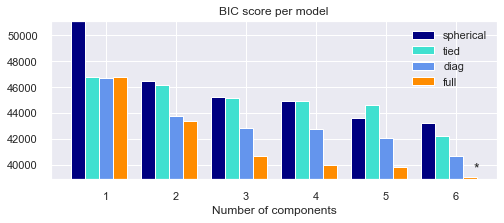

In [299]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

X = prepared_data

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)


plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()

In [300]:
df_gmm = df.copy()

In [301]:
# Building & Fitting GMM Models
#using 3 clusters as six seems not to fit the dataset properly
gmm = GaussianMixture(n_components = 4).fit(prepared_data)
labels = gmm.predict(prepared_data)

df_gmm['clusters'] = labels

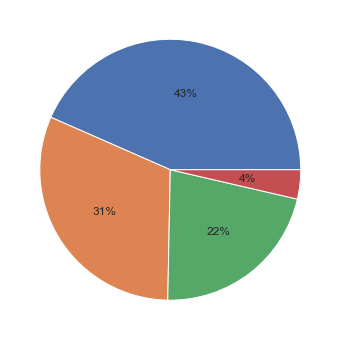

[959 479 691  80]


In [302]:
# Inspect the cluter nums
plt.figure(figsize=(6,6))
data = df_gmm['clusters'].value_counts()
#create pie chart
plt.pie(data,  autopct='%.0f%%')
plt.show()
print(np.bincount(labels))

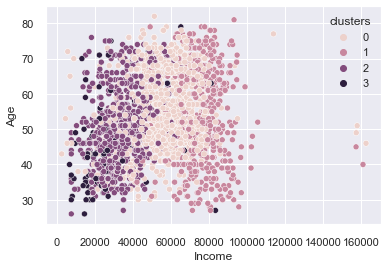

In [303]:
# Inspect the cluster difference (By Income & Age)
sns.scatterplot(x='Income',y='Age',hue='clusters',data=df_gmm)
plt.show()

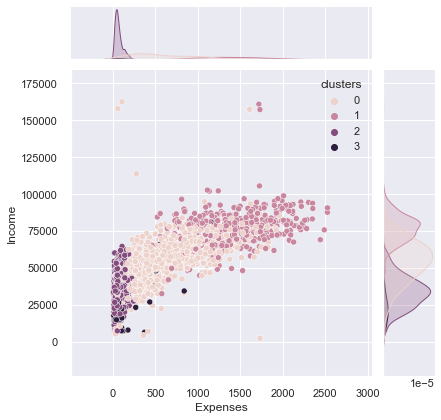

In [304]:
sns.jointplot(x = 'Expenses', y='Income',data =df_gmm, kind = 'scatter', hue = 'clusters' )

C:\Users\CGSIAHA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



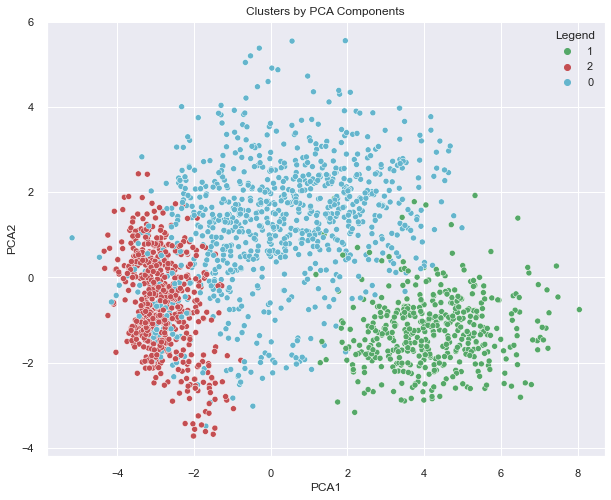

In [305]:
data_pca3 = data_pca.copy()
data_pca3['Segments'] = labels
data_pca3['Legend'] = data_pca3['Segments'].map({0:'0', 
           1:'1',
           2:'2'})
x_axis = data_pca3['PCA1']
y_axis = data_pca3['PCA2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = data_pca3['Legend'], palette = ['g', 'r', 'c'])    
plt.title('Clusters by PCA Components')
plt.show()

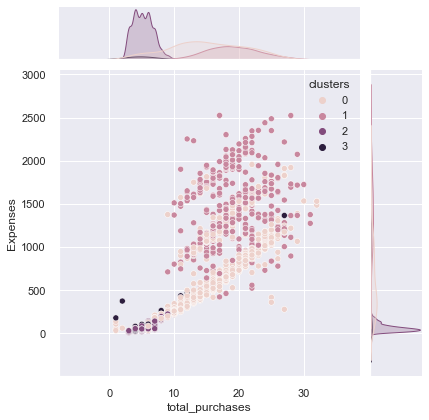

In [306]:
sns.jointplot(x = 'total_purchases', y='Expenses',data =df_gmm, kind = 'scatter', hue = 'clusters' )

#### Conclusion: K-means gives us the optimal clusters defintion with the highest silhouette score and Calinski_harabasz score.  We will proceed with K-Means clustering as the aglorithm of choice with a k value of 3

# Segment Profiling

In [354]:
kmeans = KMeans(n_clusters=3, init='k-means++', algorithm = 'full', max_iter = 150)
kmeans.fit(prepared_data)
cluster_labels = kmeans.fit_predict(prepared_data)
print('Iterations: ',kmeans.n_iter_)
print("Silhouette Score is: ",silhouette_score(prepared_data, cluster_labels))

Iterations:  15
Silhouette Score is:  0.3207303577401281


In [355]:
pd.set_option('display.max_columns', None)
df_kmeans = df.copy()
df_kmeans['clusters'] = kmeans.labels_
df_kmeans.groupby(['clusters']).mean()

Education  Marital_Status        Income   Kidhome  Teenhome  \
clusters                                                                
0          0.998188        0.405797  75779.775362  0.023551  0.088768   
1          1.000000        0.314425  59262.311183  0.236629  0.967585   
2          0.949038        0.350000  34993.266346  0.785577  0.454808   

            Recency       Wines     Fruits        Meat       Fish     Sweets  \
clusters                                                                       
0         49.396739  615.023551  65.184783  453.961957  98.152174  68.045290   
1         48.575365  471.283630  27.846029  153.453809  34.735818  27.619125   
2         49.052885   44.025000   5.022115   23.815385   7.480769   5.085577   

               Gold  NumDealsPurchases       Web   Catalog     Store  \
clusters                                                               
0         75.463768           1.152174  5.114130  5.942029  8.327899   
1         63.850891           3.795786  6.461912  3.316045  7.875203   
2         15.727885           2.054808  2.153846  0.569231  3.265385   

          NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
clusters                                                                
0                  2.804348      0.088768      0.128623      0.271739   
1                  5.661264      0.063209      0.129660      0.019449   
2                  6.416346      0.072115      0.012500      0.000000   

          AcceptedCmp1  AcceptedCmp2  Complain  Response  family_size  \
clusters                                                                
0             0.211957      0.036232  0.005435  0.302536     1.706522   
1             0.038898      0.012966  0.008104  0.116694     2.889789   
2             0.000962      0.001923  0.012500  0.090385     2.890385   

             Expenses  TotalAcceptedCmp      kids    parent  total_purchases  \
clusters                                                                       
0         1375.831522          1.039855  0.112319  0.110507        19.384058   
1          778.789303          0.380875  1.204214  0.978930        17.653160   
2          101.156731          0.177885  1.240385  0.879808         5.988462   

          Custom_days        Age  
clusters                          
0          509.583333  53.518116  
1          569.654781  57.082658  
2          480.204808  50.466346

In [356]:
df_kmeans.to_csv('Customer_segments.csv')

In [357]:
def plotting_percentages(df, col, target):
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df.groupby(y)[x].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting
#     order_list = ["We don't provide any online services","Not sure / can't say", "Below average", "Average", 
#                "Successful", "Very successful"]
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=y,kind='bar', data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round()) #+ '%'
        txt = txt.rstrip('0').rstrip('.') if '.' in txt else txt
        txt = txt +'%'
        #print(txt)
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=30)
    return g

C:\Users\CGSIAHA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show(close=None, block=None)>

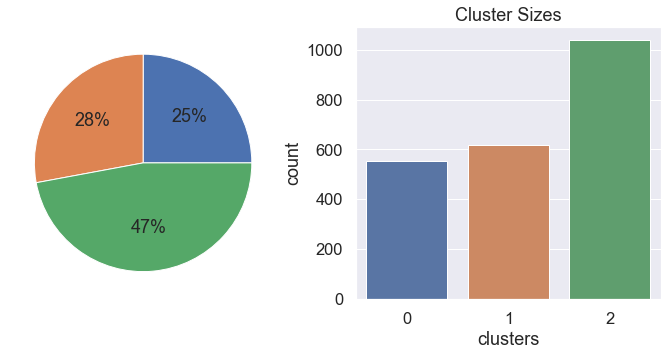

In [358]:
y= np.bincount(kmeans.labels_)
data = np.bincount(kmeans.labels_)
fig = plt.figure(figsize=(12,5))
    
#create pie chart
fig.add_subplot(121)
plt.pie(data,  autopct='%.0f%%')
#plt.title('Q10. In general, how would you rate your digital skills?')
#plt.show()
fig.add_subplot(122)
sns.countplot(df_kmeans['clusters'])
plt.title('Cluster Sizes')
plt.show

In [359]:
data_pca['Segment'] = kmeans.labels_
data_pca.sample()

PCA1     PCA2      PCA3      PCA4      PCA5      PCA6  Segment  \
399  3.487489  3.65794  0.337508 -0.863656  1.952827 -0.649218        1   

                     Legend  
399  Middle Income Parents

C:\Users\CGSIAHA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



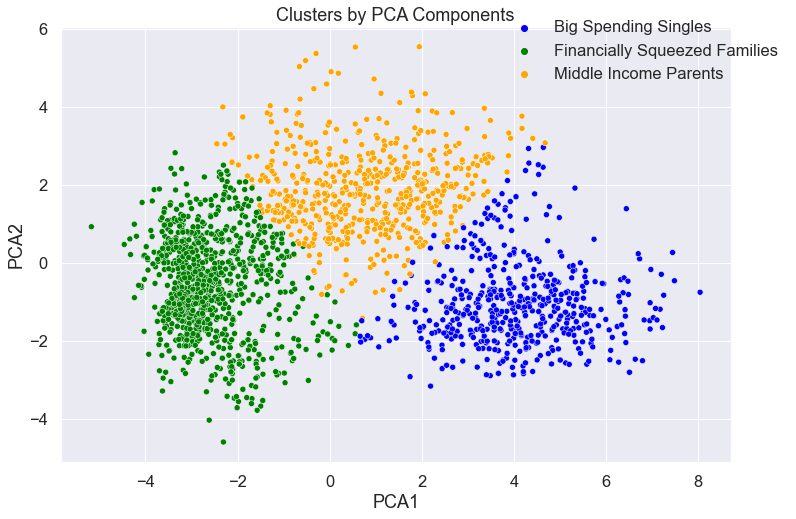

In [360]:
data_pca['Legend'] = data_pca['Segment'].map({0:'Big Spending Singles ', 
           1:'Middle Income Parents ',
           2:'Financially Squeezed Families '}) 
         
x_axis = data_pca['PCA1']
y_axis = data_pca['PCA2']
plt.figure(figsize = (12, 8))
sns.scatterplot(x_axis, y_axis, hue = data_pca['Legend'], palette = ['blue', 'green','orange'])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Clusters by PCA Components')
plt.show()

In [361]:
#Ploting result data with the use of scatterplot. plotly
c = ['aliceblue', 'darkred','khaki']
x_axis = data_pca['PCA1']
y_axis = data_pca['PCA2']
z_axis = data_pca['PCA3']
fig = go.Figure(data=[go.Scatter3d(
    x=x_axis,y=y_axis,z=z_axis,mode='markers',
    marker=dict(size=6,color = x,colorscale='Portland' ,opacity=0.8))]) #['aliceblue', 'darkred','khaki']

# tight layout
fig.update_layout( title={'text': "3D scatterplot of PCAs 1,2 & 3",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

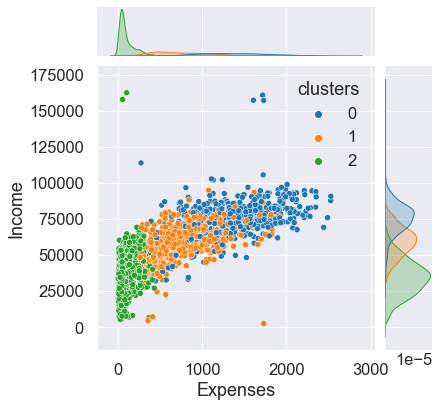

In [377]:
sns.jointplot(x = 'Expenses', y='Income',data =df_kmeans, kind = 'scatter', hue = 'clusters', palette = 'tab10')

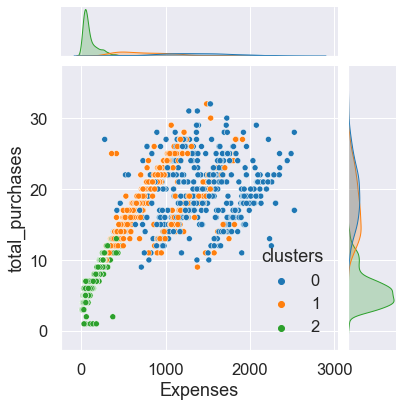

In [378]:
sns.jointplot(y = 'total_purchases', x='Expenses',data =df_kmeans, kind = 'scatter', hue = 'clusters', palette = 'tab10' )

<AxesSubplot:xlabel='clusters', ylabel='Age'>

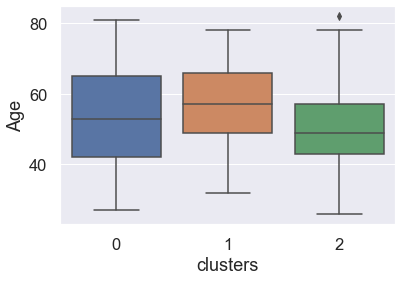

In [364]:
sns.boxplot(x=df_kmeans["clusters"], y=df_kmeans["Age"])

<AxesSubplot:xlabel='clusters', ylabel='Kidhome'>

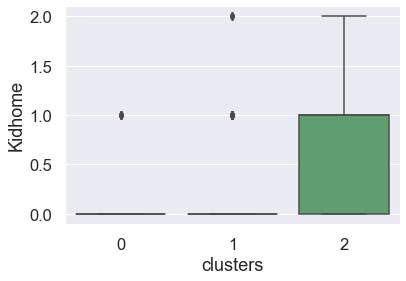

In [365]:
sns.boxplot(data=df_kmeans, x='clusters', y = 'Kidhome')

<AxesSubplot:xlabel='clusters', ylabel='Teenhome'>

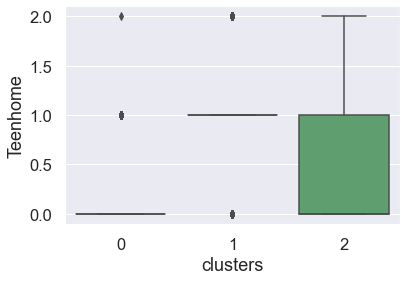

In [366]:
sns.boxplot(data=df_kmeans, x='clusters', y = 'Teenhome')

C:\Users\CGSIAHA\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\CGSIAHA\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



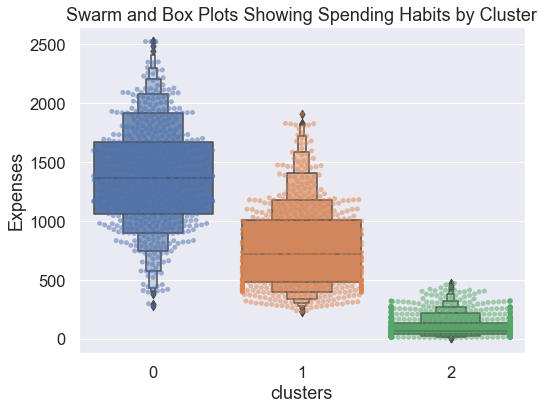

In [367]:
plt.figure(figsize = (8,6))
pl=sns.swarmplot(x=df_kmeans["clusters"], y=df_kmeans["Expenses"], alpha=0.5 )
pl=sns.boxenplot(x=df_kmeans["clusters"], y=df_kmeans["Expenses"])
plt.title("Swarm and Box Plots Showing Spending Habits by Cluster")
plt.show()

<AxesSubplot:xlabel='clusters', ylabel='Income'>

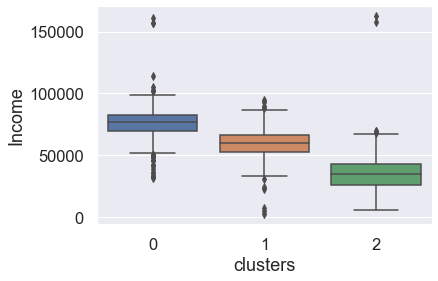

In [368]:
sns.boxplot(x=df_kmeans["clusters"], y=df_kmeans["Income"])

<AxesSubplot:xlabel='family_size', ylabel='Expenses'>

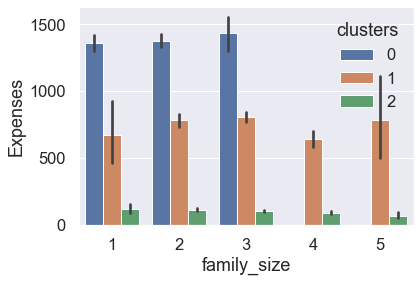

In [369]:
sns.barplot(x='family_size', y='Expenses', data=df_kmeans, hue = 'clusters')

Text(0.5, 1.0, 'Percentages for each cluster that has higher education')

<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


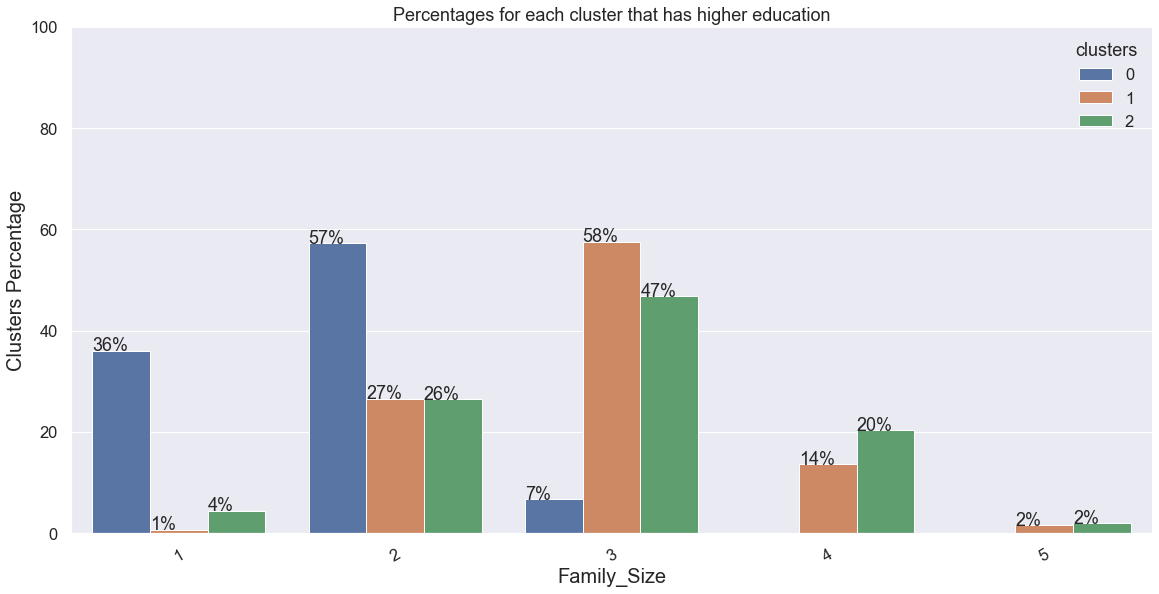

In [370]:
plt.figure(figsize=(6,4))
plotting_percentages(df_kmeans,'family_size','clusters')
plt.title('Percentages for each cluster that has higher education')

<AxesSubplot:xlabel='parent', ylabel='Income'>

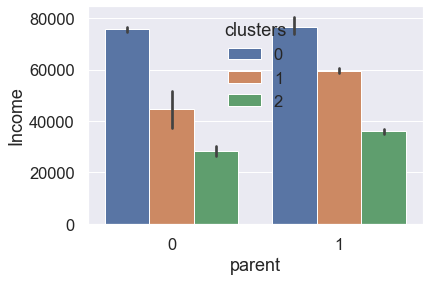

In [371]:
sns.barplot(x='parent', y='Income', data=df_kmeans, hue = 'clusters')

Text(0.5, 1.0, 'Percentages for each cluster that is parent')

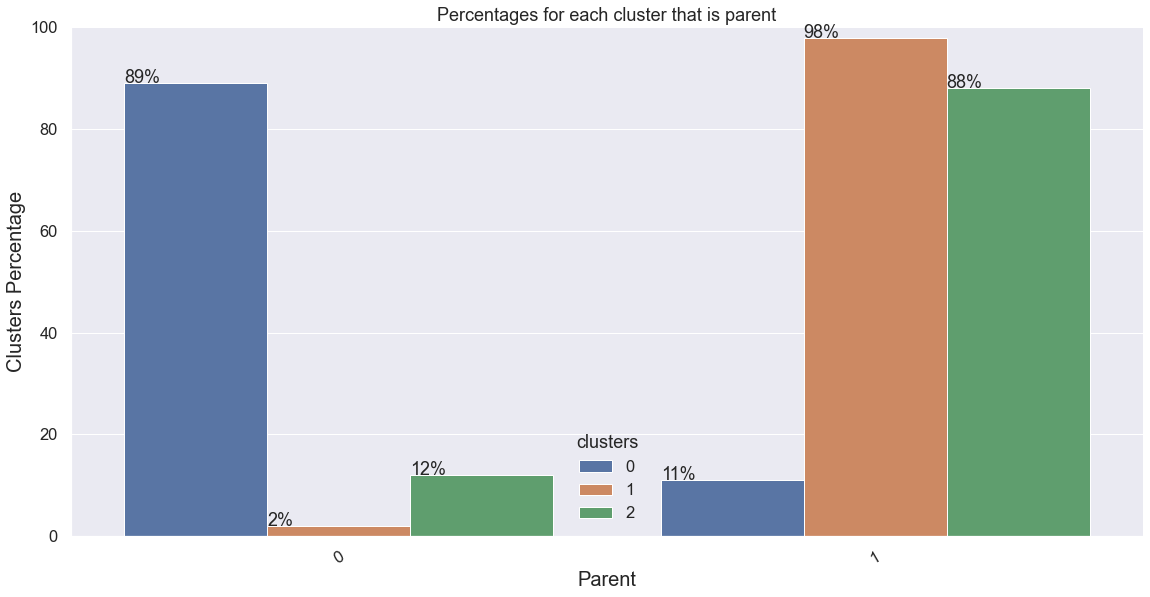

In [372]:
plotting_percentages(df_kmeans,'parent','clusters')
plt.title('Percentages for each cluster that is parent')

Text(0.5, 1.0, 'Percentages for each cluster that has higher education')

posx and posy should be finite values
posx and posy should be finite values


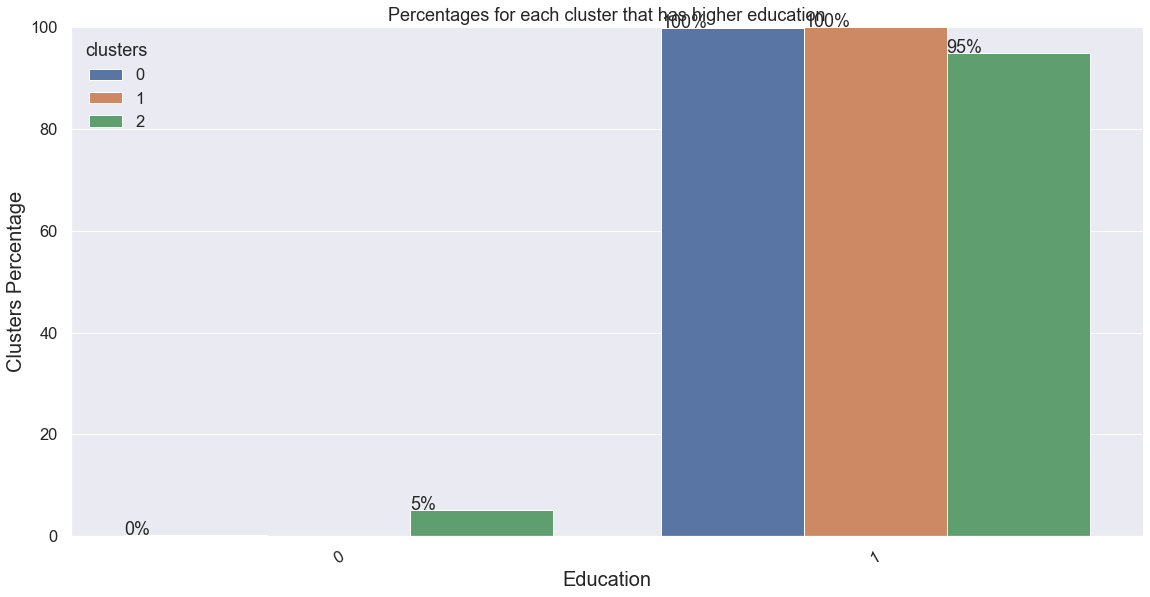

In [373]:
plotting_percentages(df_kmeans,'Education','clusters')
plt.title('Percentages for each cluster that has higher education')

Text(0.5, 1.0, 'Count of Promotions Accepted')

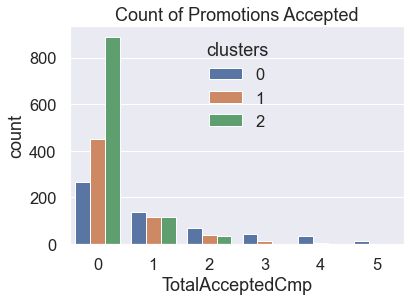

In [374]:
sns.countplot(x=df_kmeans["TotalAcceptedCmp"],hue=df_kmeans["clusters"])
plt.title('Count of Promotions Accepted')

In [375]:
df_kmeans.sample()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  Wines  \
745          1               0  83844.0        0         0       57    901   

     Fruits  Meat  Fish  Sweets  Gold  NumDealsPurchases  Web  Catalog  Store  \
745      31   345    75      31   191                  1    4        4     11   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
745                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Response  family_size  Expenses  \
745             0             0         0         0            2      1574   

     TotalAcceptedCmp  kids  parent  total_purchases  Custom_days   Age  \
745                 1     0       0               19          366  70.0   

     clusters  
745         0

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

<Figure size 1080x864 with 0 Axes>

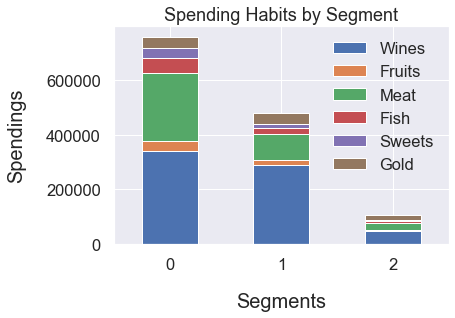

In [386]:
cluster_spendings = df_kmeans.groupby('clusters')[['Wines', 'Fruits','Meat', 
                                                  'Fish', 'Sweets', 'Gold']].sum()

plt.figure(figsize=(15,12))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Segment')
plt.xlabel('Segments', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')